# Penguins Dataset - EDA

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [85]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

#### Display the initial number of rows and columns.

In [86]:
df.shape

(344, 7)

#### Display the initial variable names and their associated data types.

In [87]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

#### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [88]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [89]:
df_clean = df.dropna().copy()

In [90]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Display the number of unique values for each column after removing missing data and before initial exploration.

In [91]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

#### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [92]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

#### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [93]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

#### Save the cleaned dataset for use in other project notebooks.

In [ ]:
df_clean.to_csv('penguins-clean.csv', index=False)

## Convert Data: Long Format

### Categorical Names

In [94]:
df_clean_category_names = df_clean.select_dtypes(['object', 
                                                  'category']). \
                                                  columns.tolist()

In [95]:
df_clean_category_names

['species', 'island', 'sex']

### Numeric Names

In [96]:
df_clean_numeric_names = df_clean.select_dtypes('number'). \
                                  columns.tolist()

In [97]:
df_clean_numeric_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

### Reshape

In [98]:
df_clean_lf = df_clean.reset_index().\
                       rename(columns={'index': 'rowid'}). \
                       melt(id_vars=['rowid'] + df_clean_category_names, 
                            value_vars=df_clean_numeric_names)

## Visually Explore Data

### Count Plots – Marginal Distributions of Each Categorical Variable, with Facets for Each Categorical Variable

The data reveals a roughly equal distribution of male and female penguins, with Adelie being the most common species and Biscoe the most represented island, while Chinstrap and Torgersen are the least frequent species and island, respectively.

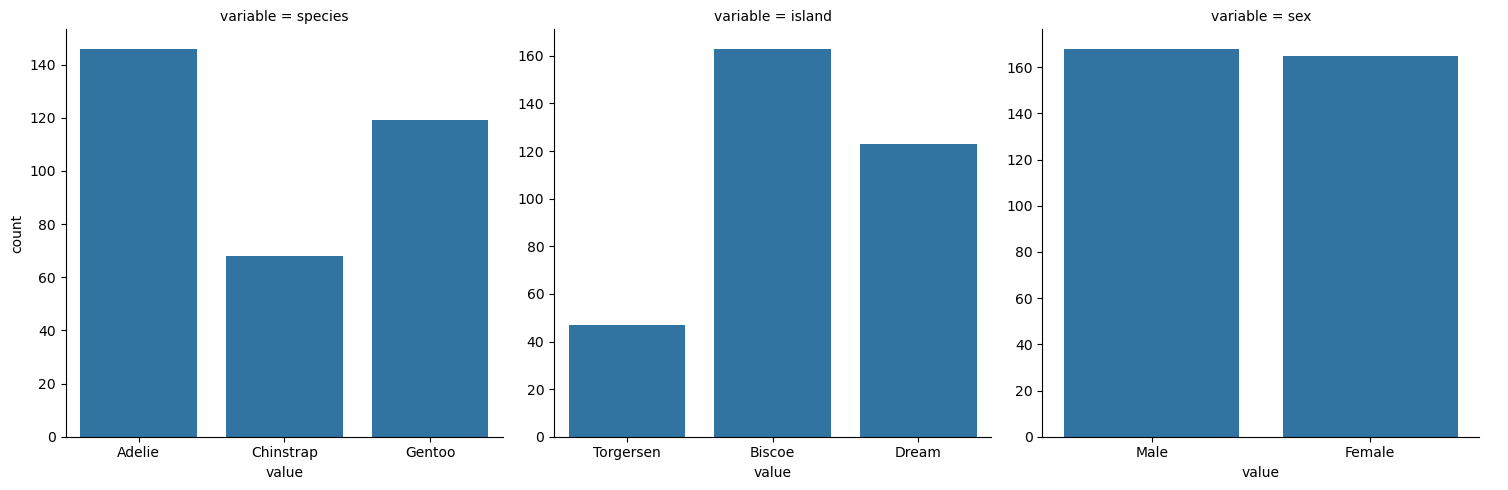

In [99]:
sns.catplot(data=df_clean.melt(value_vars=df_clean_category_names), 
            x='value', 
            col='variable', 
            col_wrap=3,
            kind='count',
            sharex=False,
            sharey=False)
plt.show()

### Count Plots – Marginal Distributions of the `species` Categorical Variable, with Facets for Each `island` Categorical Variable

Gentoo penguins are found exclusively on Biscoe island, Chinstrap only on Dream island, while Adelie is present on all three islands.

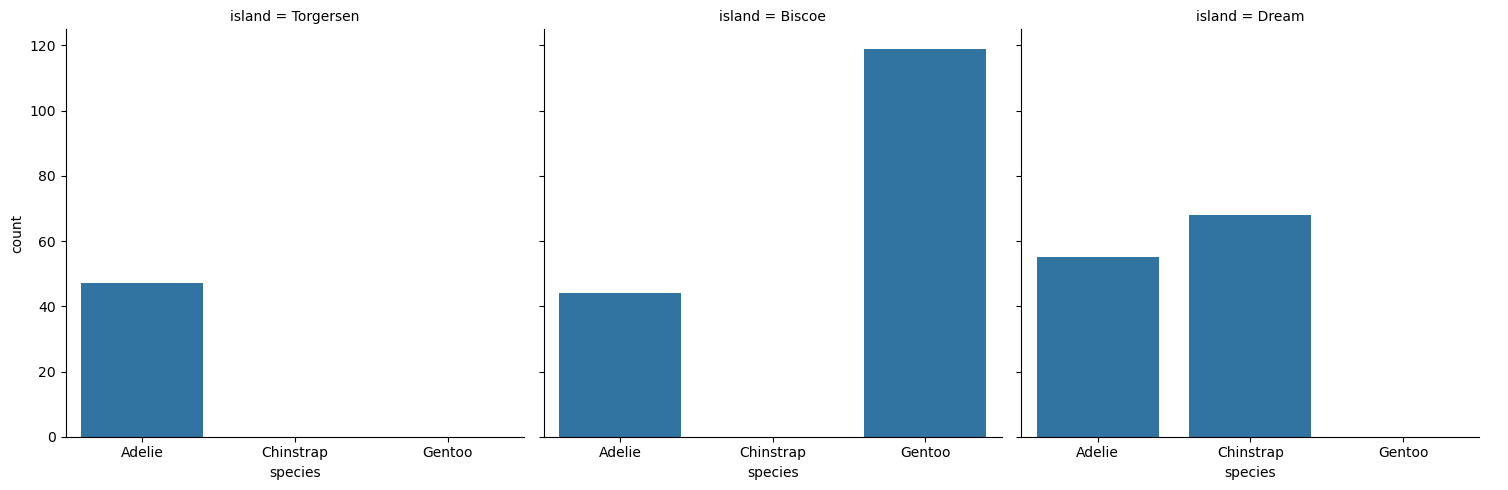

In [100]:
sns.catplot(data=df_clean, 
            x='species', 
            col='island', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `island` Categorical Variable, with Facets for Each `species` Categorical Variable

Adelie penguins are evenly distributed across all three islands, Chinstrap is found only on Dream island, and Gentoo is present exclusively on Biscoe island.

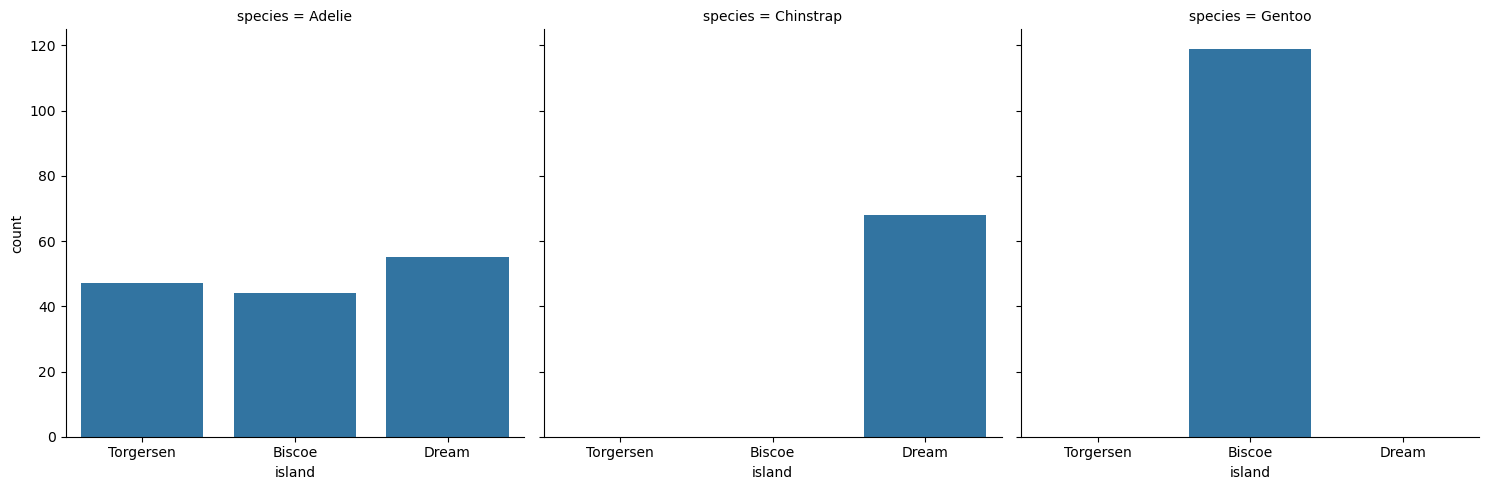

In [101]:
sns.catplot(data=df_clean, 
            x='island', 
            col='species', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `species` Categorical Variable, Colored by Each `island` Categorical Variable

Adelie penguins are distributed across all islands, Chinstrap is exclusive to Dream island, and Gentoo is found only on Biscoe island.

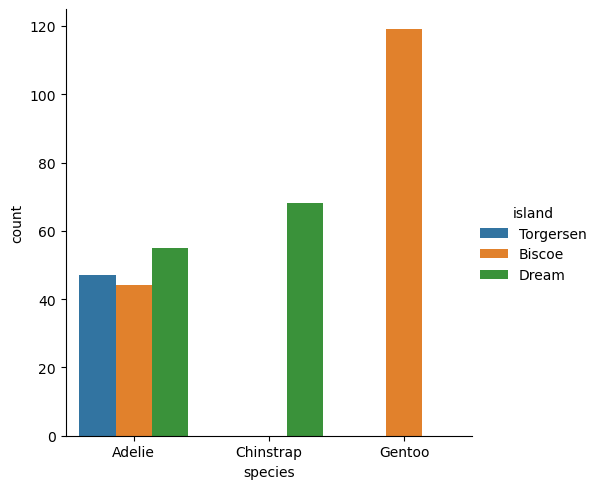

In [102]:
sns.catplot(data=df_clean, 
            x='species', 
            hue='island', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `species` Categorical Variable, with Facets for Each Combination of `sex` and `island` Categorical Variables

Across all islands, Adelie penguins are evenly distributed between sexes, Chinstrap is found only on Dream island with more females than males, and Gentoo is exclusive to Biscoe island, where males are slightly more numerous than females.

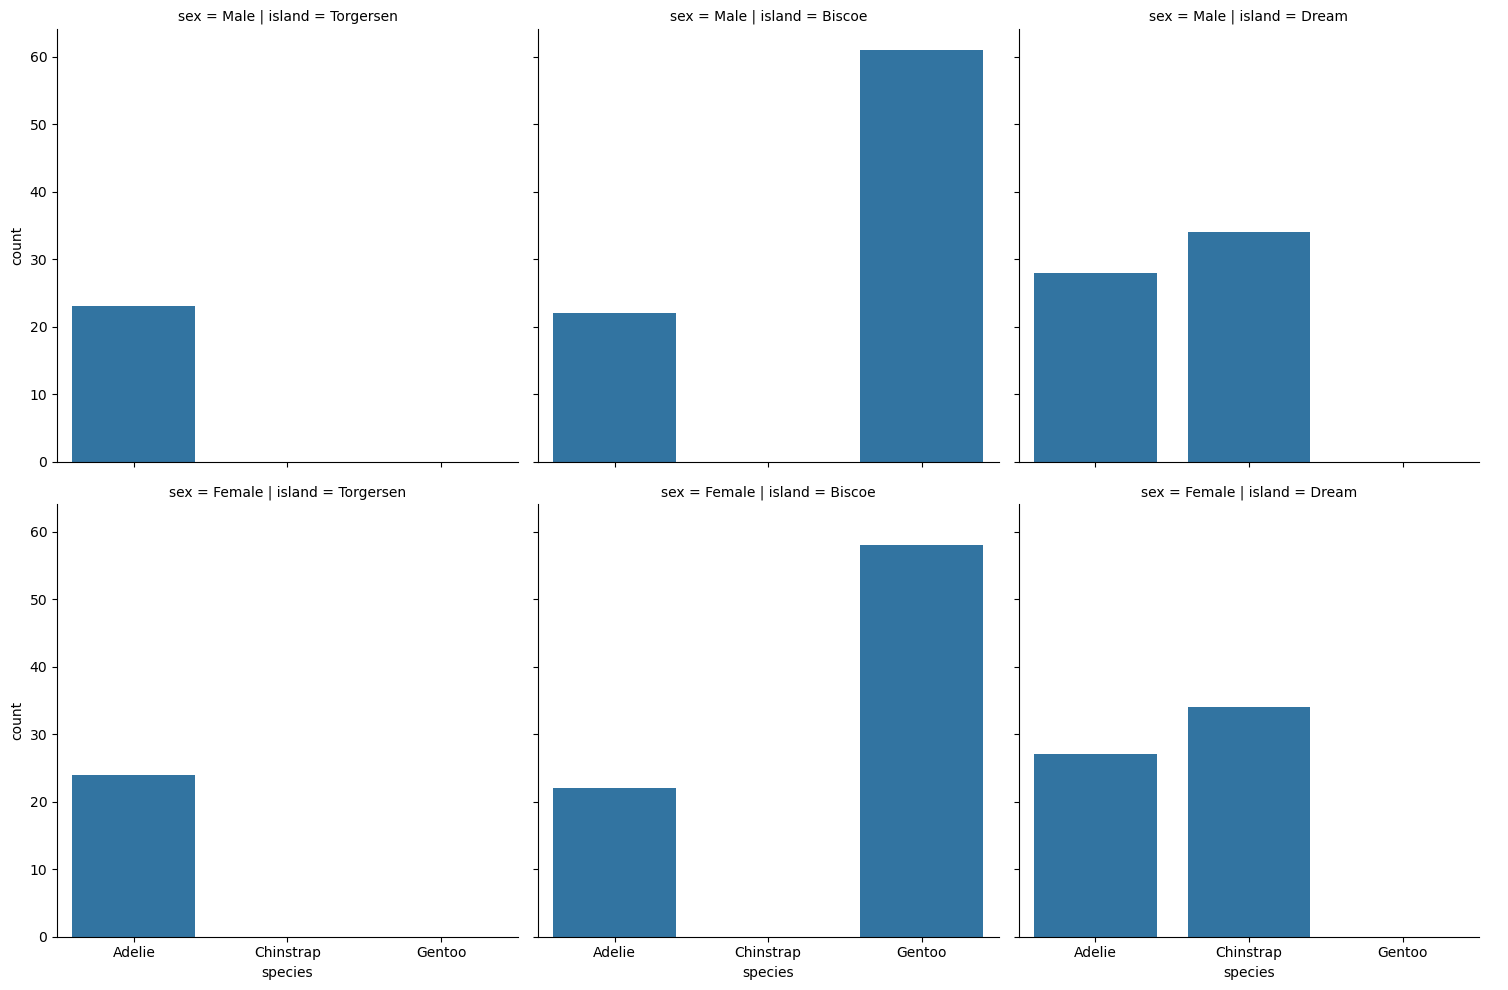

In [103]:
sns.catplot(data=df_clean, 
            x='species', 
            row='sex',
            col='island', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `species` Categorical Variable, Colored by Each `island` Categorical Variable, with Facets for Each `sex` Categorical Variable

Both males and females show a similar distribution: Adelie penguins are present on all islands, Chinstrap is exclusive to Dream island, and Gentoo is found only on Biscoe island.

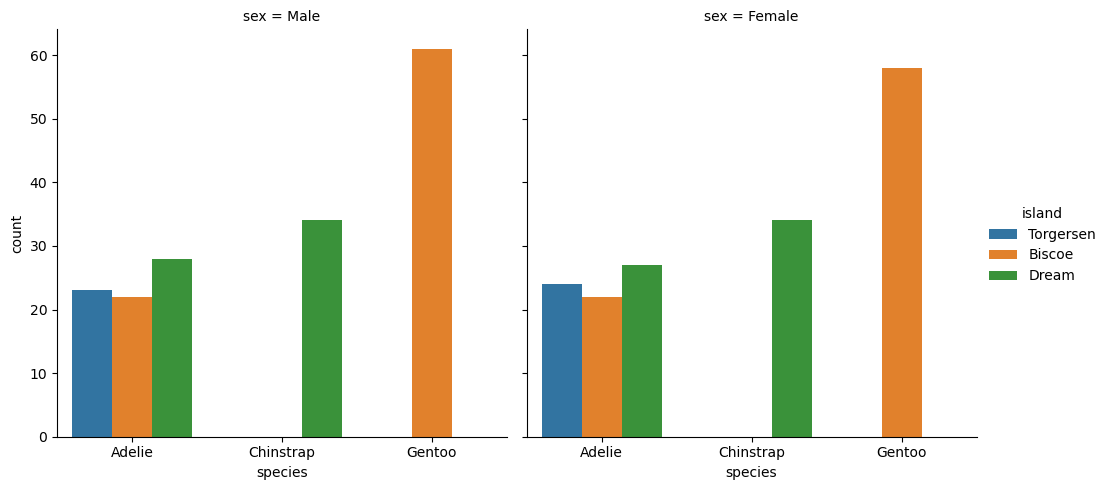

In [104]:
sns.catplot(data=df_clean, 
            x='species', 
            hue='island', 
            col='sex', 
            kind='count')
plt.show()

### Count Plots – Marginal Distributions of the `species` Categorical Variable, Colored by Each `sex` Categorical Variable, with Facets for Each `island` Categorical Variable

On each island, Adelie penguins are evenly split between sexes, Gentoo is exclusive to Biscoe with similar male and female counts, and Chinstrap is found only on Dream island with equal representation of both sexes.

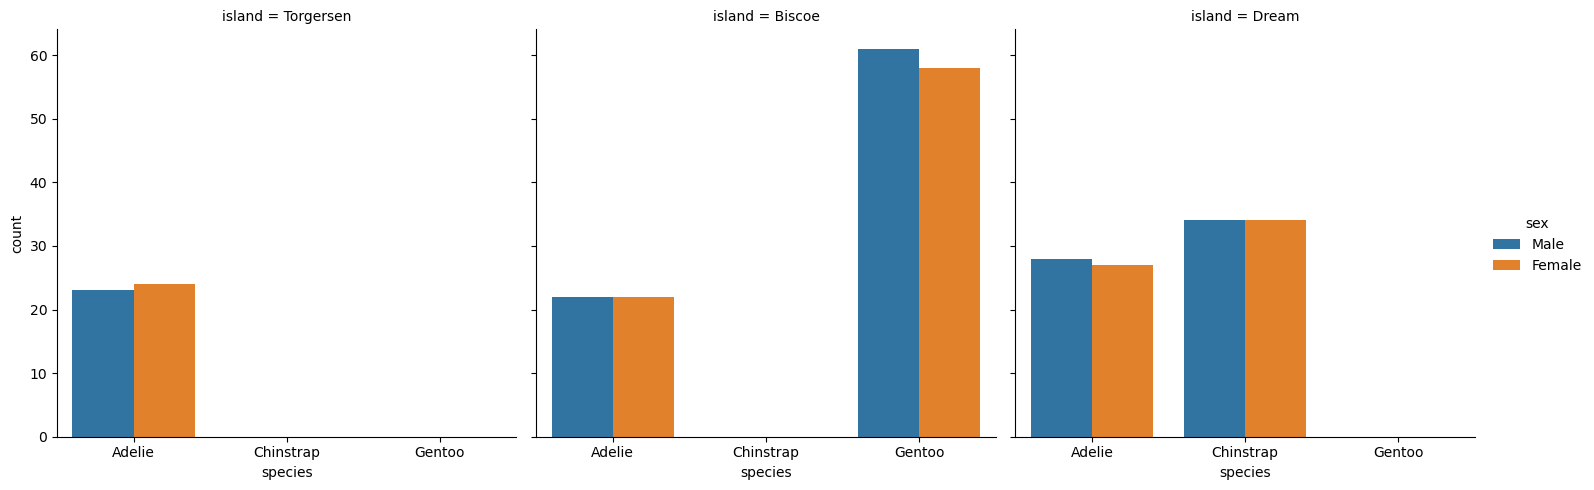

In [105]:
sns.catplot(data=df_clean, 
            x='species', 
            hue='sex', 
            col='island', 
            kind='count')
plt.show()

### Histogram Plots – Marginal Distributions of Each Numerical Variable, with Facets for Each Numerical Variable

The distributions of bill length, bill depth, flipper length, and body mass are all approximately unimodal and show moderate variation, with most measurements concentrated around their respective central values.

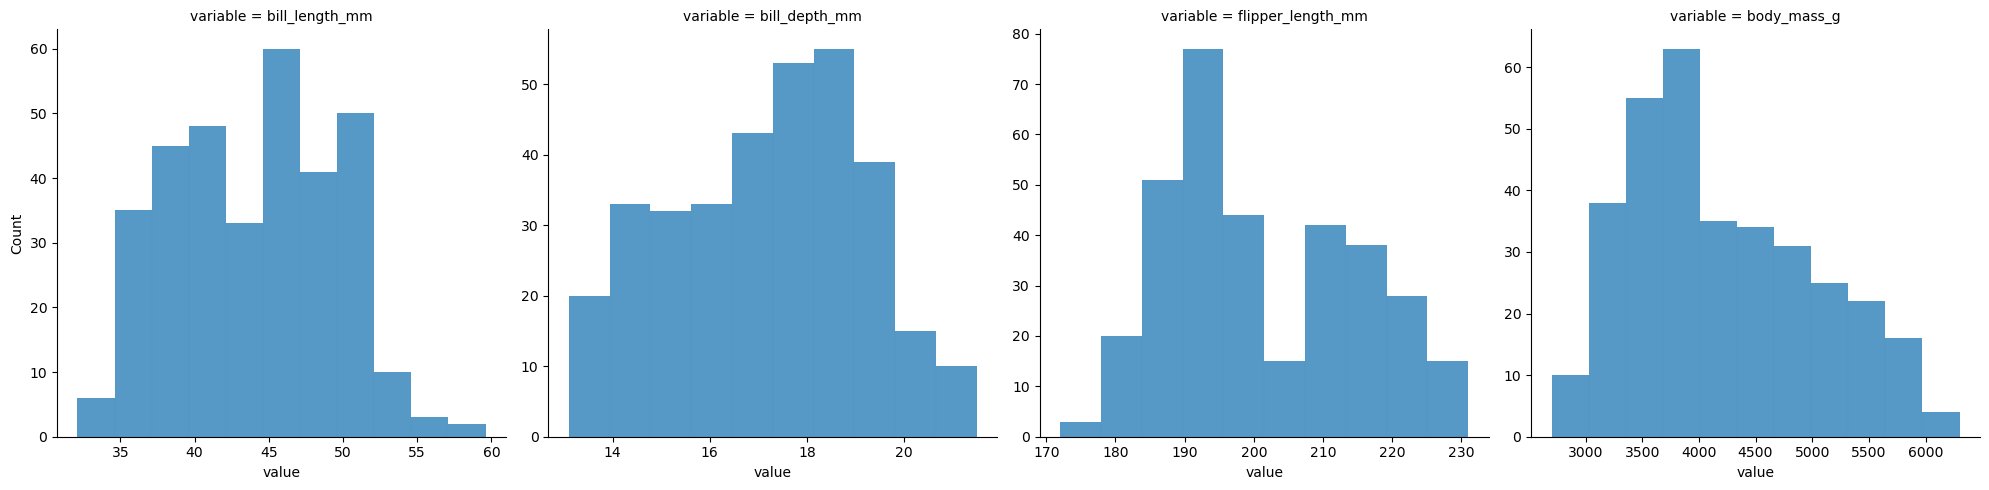

In [106]:
sns.displot(data=df_clean_lf, 
            x='value', 
            col='variable', 
            col_wrap=4,
            kind='hist',
            facet_kws={'sharex': False, 
                       'sharey': False},
            common_bins=False)
plt.show()

### Histogram Plots – Marginal Distributions of the `flipper_length_mm` Continuous Variable, with Facets for Each `species` Categorical Variable

Adelie and Chinstrap penguins have overlapping flipper length distributions centered around 190–200 mm, while Gentoo exhibits distinctly longer flipper lengths, mostly between 210 and 230 mm.

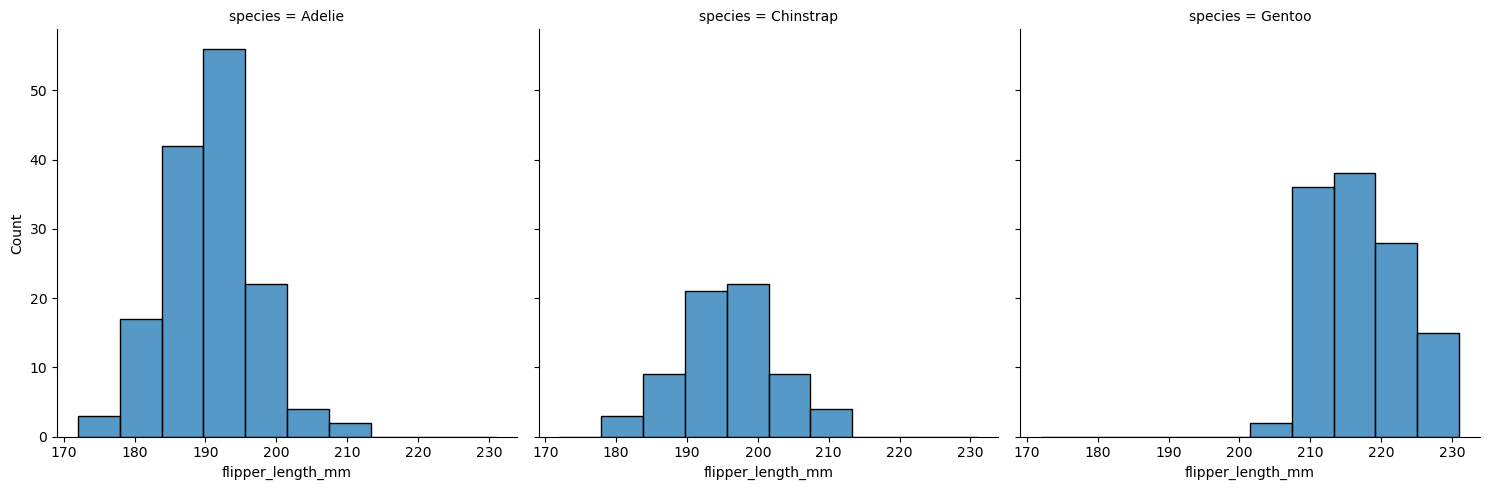

In [107]:
sns.displot(data=df_clean, 
            x='flipper_length_mm', 
            col='species', 
            kind='hist')
plt.show()

### KDE Plot – Marginal Distribution Density of the `flipper_length_mm` Continuous Variable, Colored by Each `species` Categorical Variable

The density plot shows that Adelie and Chinstrap penguins have overlapping flipper length distributions centered around 190–200 mm, while Gentoo exhibits distinctly longer flipper lengths, mostly between 210 and 230 mm.

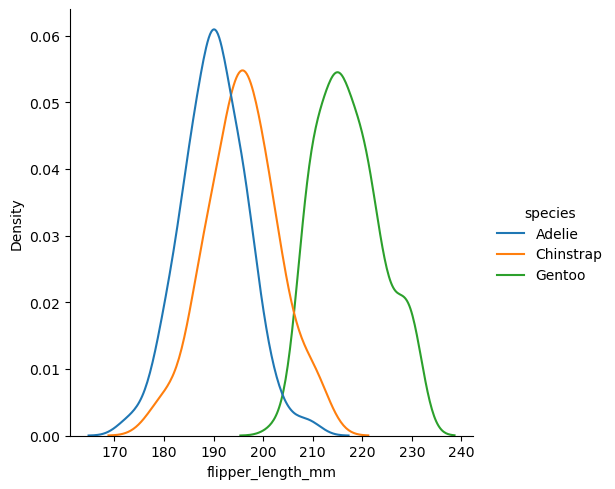

In [108]:
sns.displot(data=df_clean, 
            x='flipper_length_mm', 
            hue='species',
            common_norm=False, 
            kind='kde')
plt.show()

### Box Plots – Distribution of Each Numerical Variable by `species`, Faceted by the Respective Numerical Variable

Gentoo penguins show higher values for flipper length and body mass, Chinstrap tend to have the longest and deepest bills, while Adelie generally have the smallest measurements across all variables.

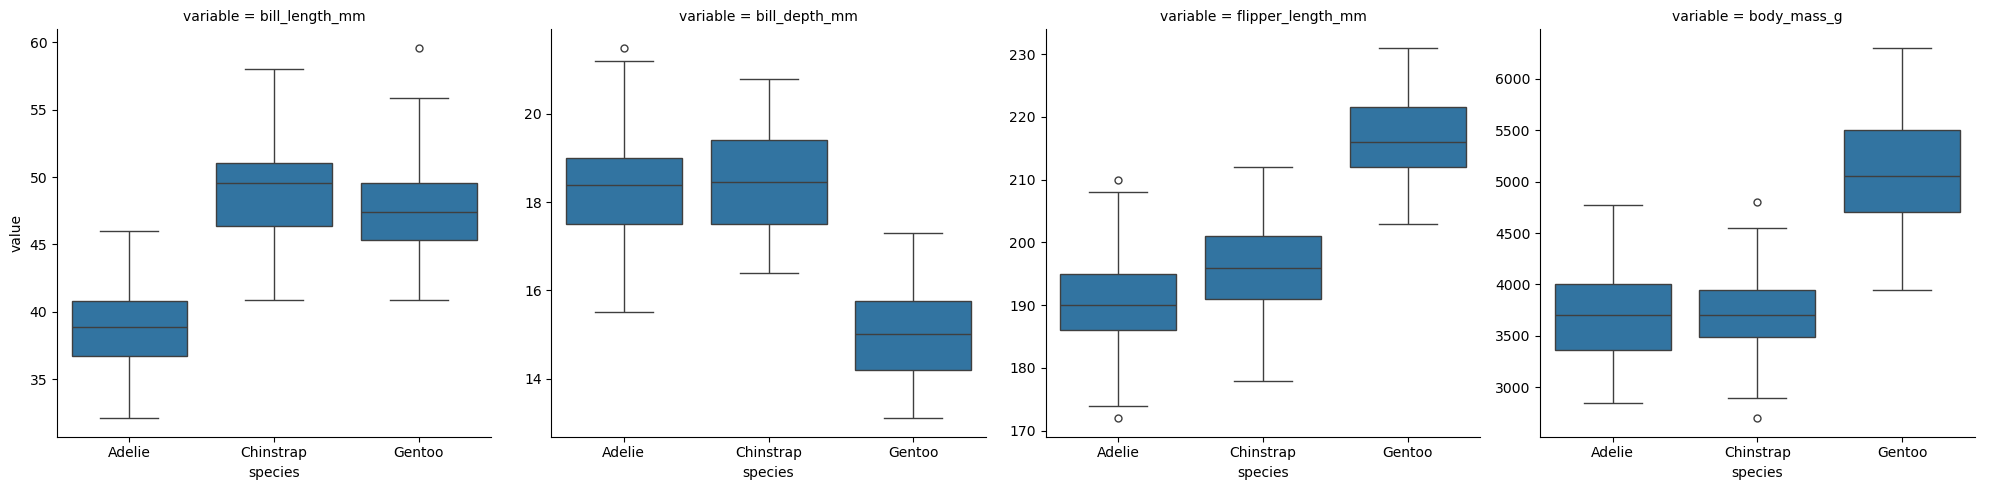

In [109]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='box', 
            sharey=False)
plt.show()

### Box Plots – Distribution of Each Numerical Variable by `species`, Colored by `island` Categorical Variable, Faceted by the Respective Numerical Variable

Adelie penguins show similar measurements across all islands, Chinstrap are present only on Dream with relatively larger bills, while Gentoo is exclusive to Biscoe and stands out for its greater flipper length and body mass.

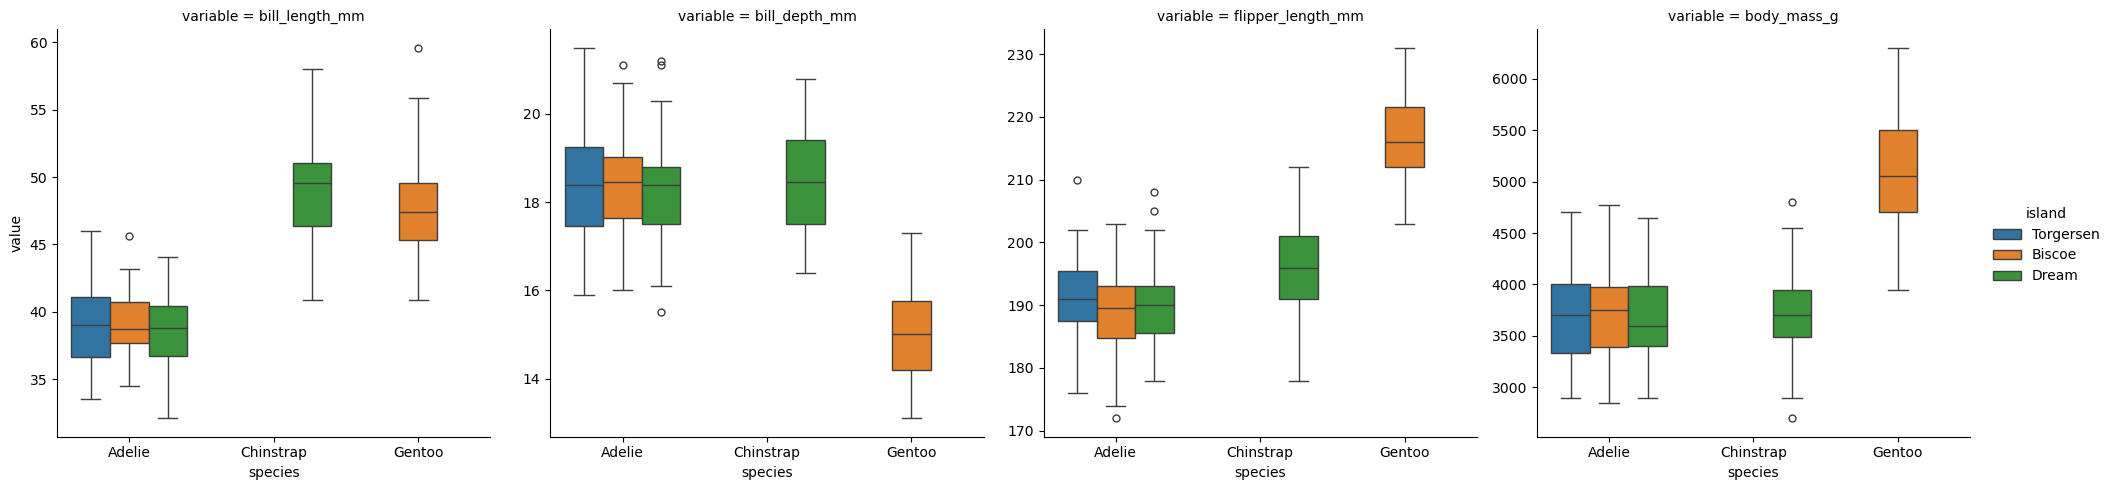

In [110]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='island',
            kind='box', 
            sharey=False)
plt.show()

### Box Plot – Marginal Distributions of the `flipper_length_mm` Continuous Variable, Grouped by Each `species` Categorical Variable

Gentoo penguins have the longest flipper lengths, followed by Chinstrap, and then Adelie. The boxplots show clear separation in flipper length among the three species, with Gentoo consistently measuring higher.

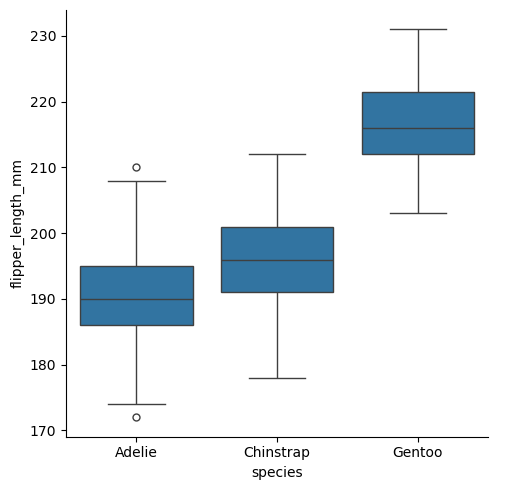

In [111]:
sns.catplot(data=df_clean, 
            x='species', 
            y='flipper_length_mm', 
            kind='box')
plt.show()

### Box Plot – Distribution of the `flipper_length_mm` Continuous Variable Across `body_mass_g` Continuous Variable, Colored by Each `sex` Categorical Variable

The plot shows that as penguins' body mass increases, their flipper length also tends to increase. This trend is consistent for both male and female penguins, with heavier penguins generally having longer flippers.

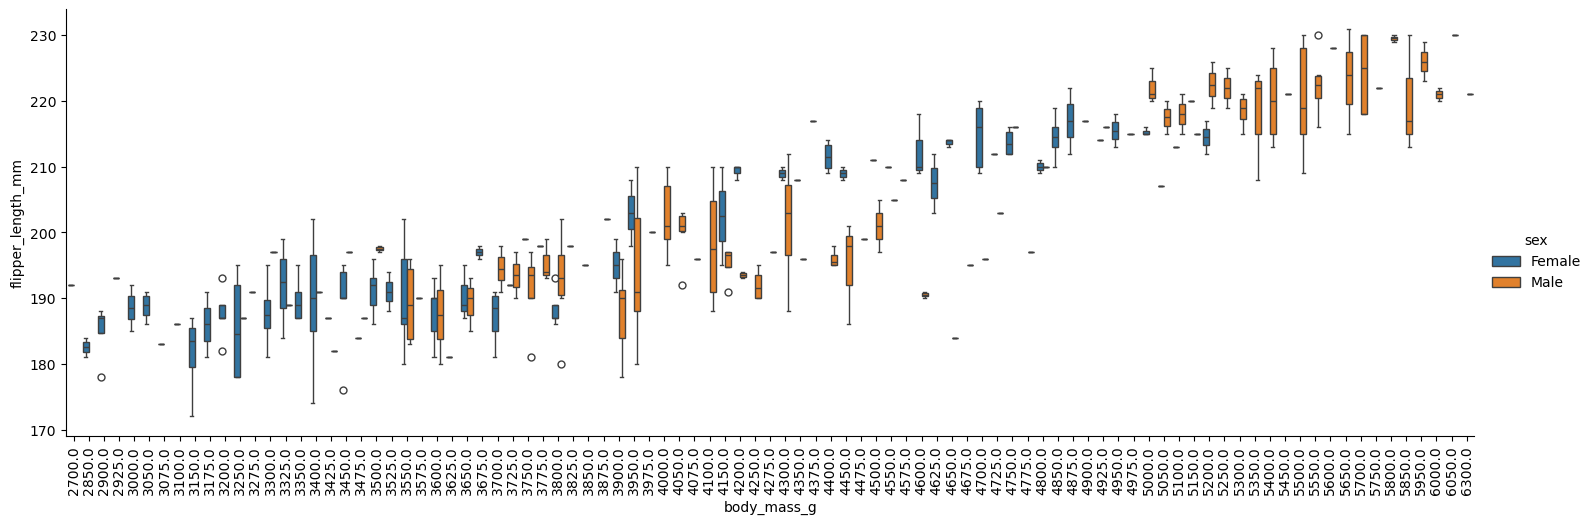

In [112]:
sns.catplot(data=df_clean, 
            x='body_mass_g', 
            y='flipper_length_mm', 
            hue='sex', 
            kind='box',
            aspect=3)
plt.xticks(rotation=90) 
plt.show()

### Violin Plots – Distribution Density of Each Numerical Variable by `species`, Faceted by the Respective Numerical Variable

Chinstrap and Gentoo penguins have longer bills compared to Adelie penguins, with Chinstrap showing the greatest bill depth. Gentoo penguins stand out for having the longest flipper lengths and the highest body mass, while Adelie penguins have the smallest measurements across all variables.

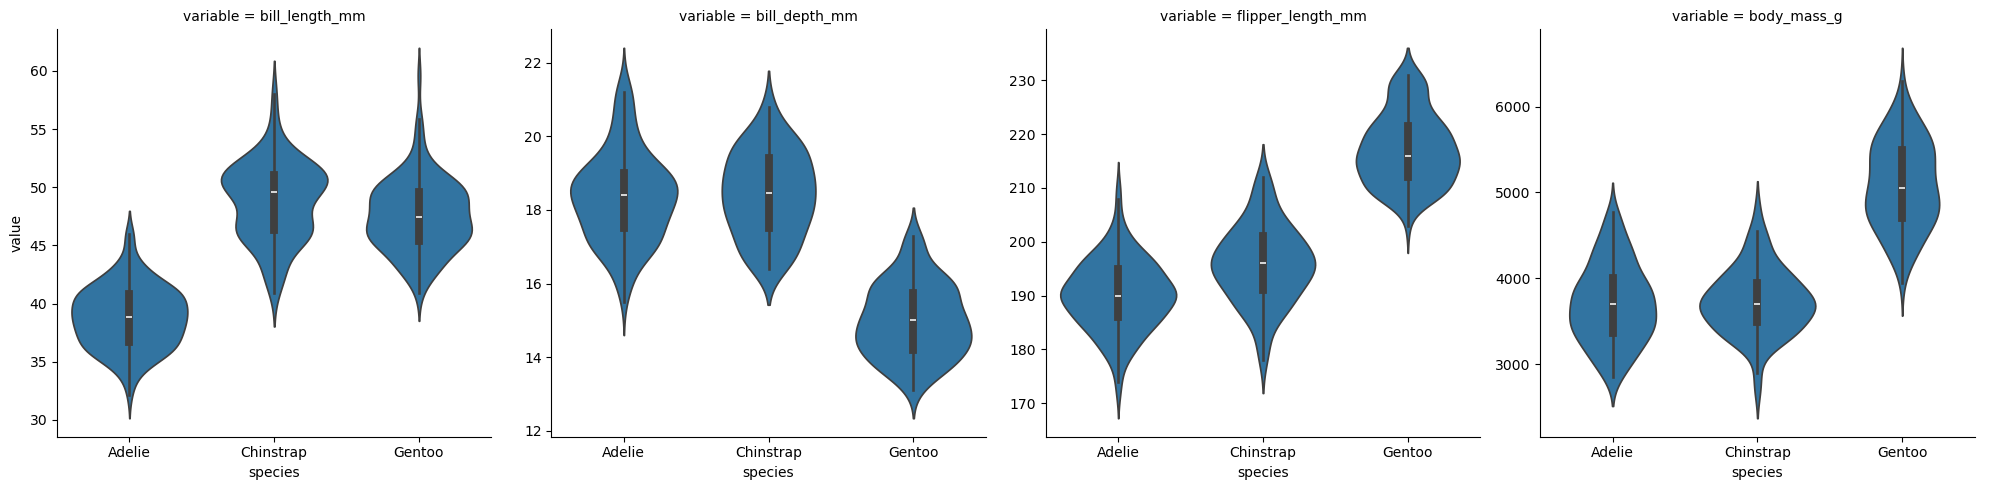

In [113]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='violin', 
            sharey=False)  
plt.show()

### Violin Plots – Distribution Density of Each Numerical Variable by `species`, Colored by `island`, Faceted by the Respective Numerical Variable

Adelie penguins have similar measurements across all islands. Chinstrap penguins, only found on Dream, have greater bill length and depth compared to Adelie. Gentoo penguins, exclusive to Biscoe, stand out for their larger flipper length and body mass. This visualization highlights clear differences in physical traits among species and islands.

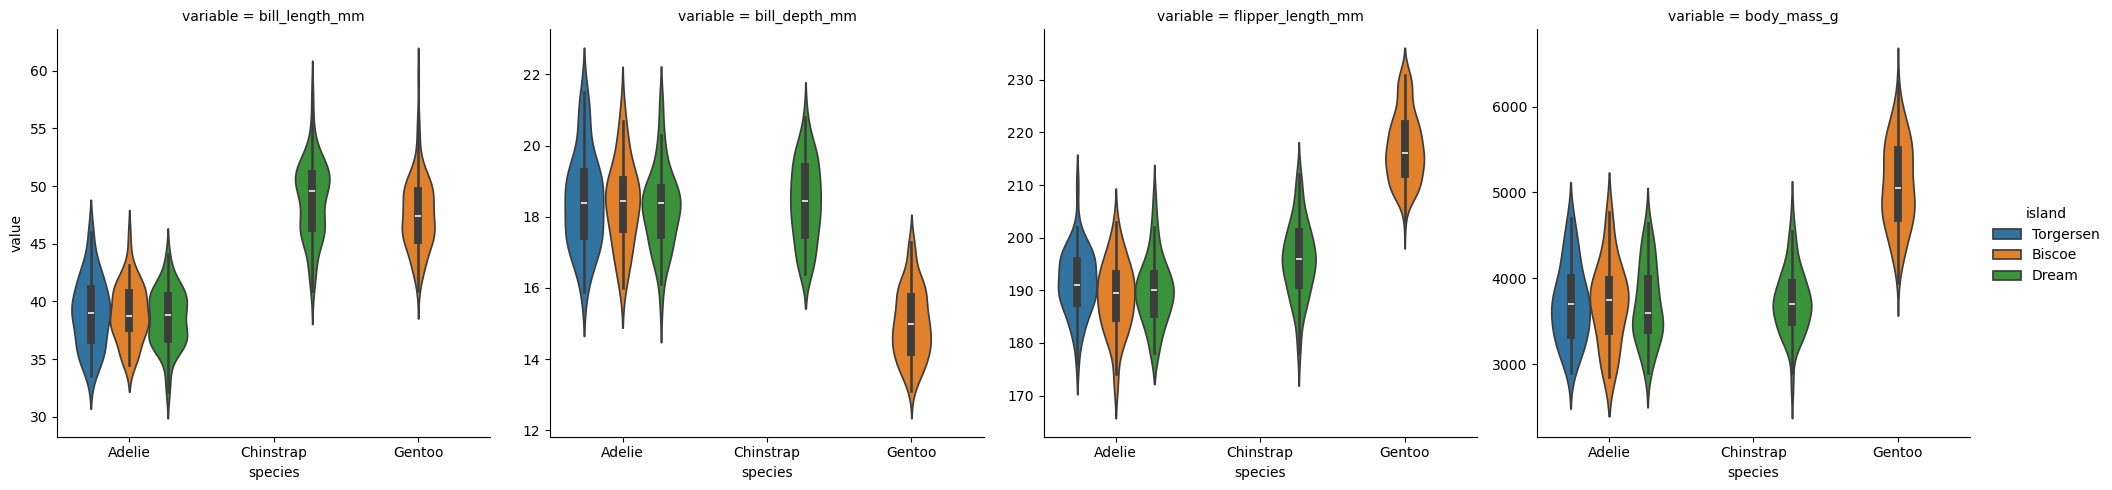

In [114]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='island',
            kind='violin', 
            sharey=False)
plt.show()

### Violin Plot – Marginal Distribution Density of the `body_mass_g` Continuous Variable, Grouped by Each `species` Categorical Variable

Gentoo penguins have the highest body mass, followed by Chinstrap, while Adelie penguins have the lowest body mass. Gentoo penguins also display greater variation in body mass compared to the other species.

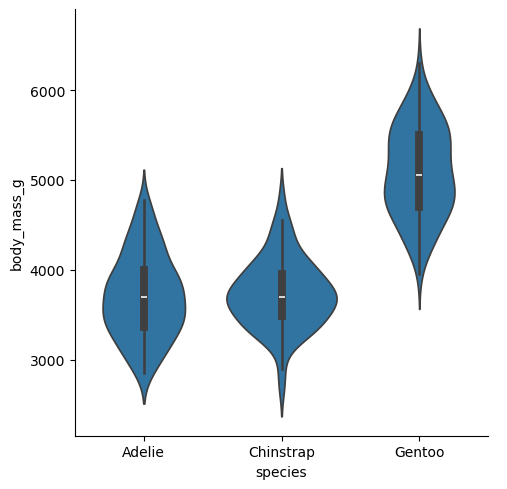

In [115]:
sns.catplot(data=df_clean, 
            x='species', 
            y='body_mass_g', 
            kind='violin')
plt.show()

### Point Plots – Mean and Confidence Interval of Each Numerical Variable by `species`, Faceted by the Respective Numerical Variable

Chinstrap penguins have the longest bills and greatest bill depth, Gentoo penguins have the longest flipper length and highest body mass, while Adelie penguins have the smallest measurements for all variables. Error bars indicate the variability around the mean values for each species.

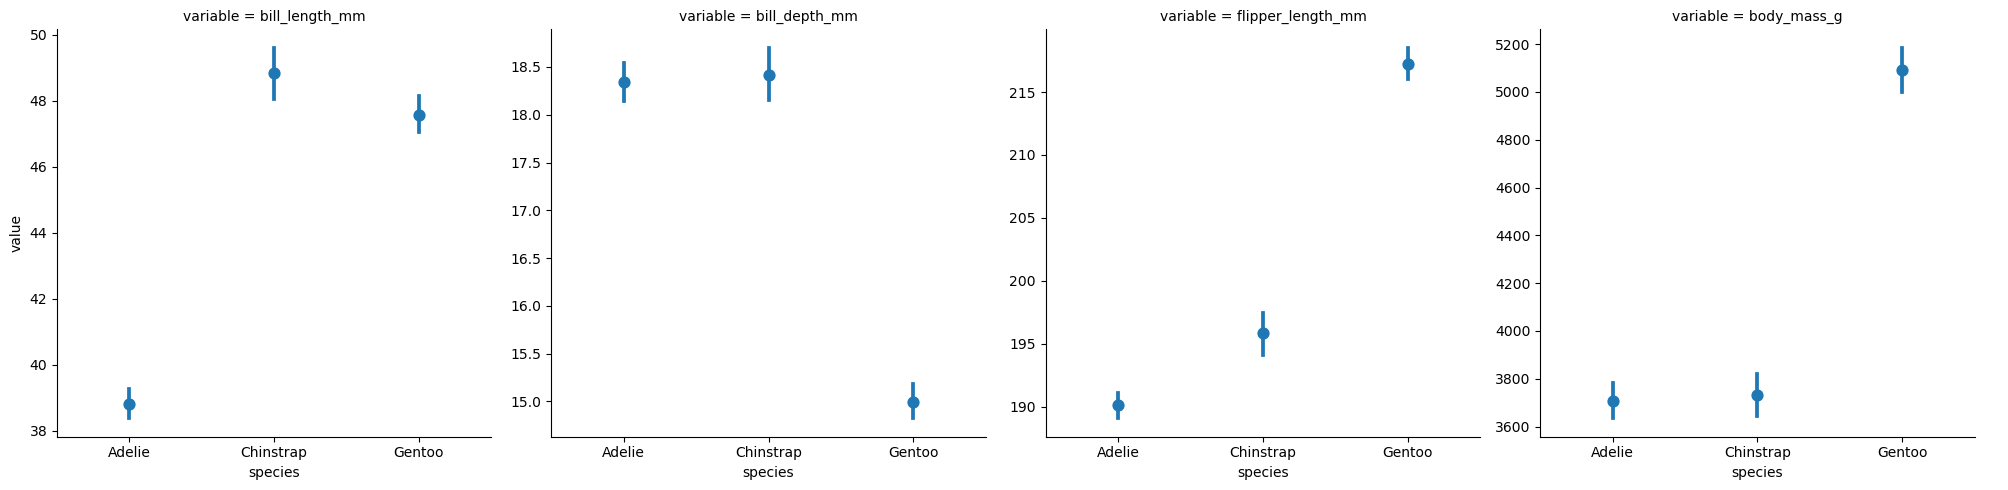

In [116]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            kind='point', 
            sharey=False,
            linestyle='none')
plt.show()

### Point Plots – Mean and Confidence Interval of Each Numerical Variable by `species`, Colored by `sex` Categorical Variable, Faceted by the Respective Numerical Variable

For all species, male penguins have higher measurements than female penguins across bill length, bill depth, flipper length, and body mass. Chinstrap males have the largest bills, Gentoo males have the longest flippers and greatest body mass, while Adelie females have the lowest values for all traits. The differences between sexes are consistent and pronounced for each variable.

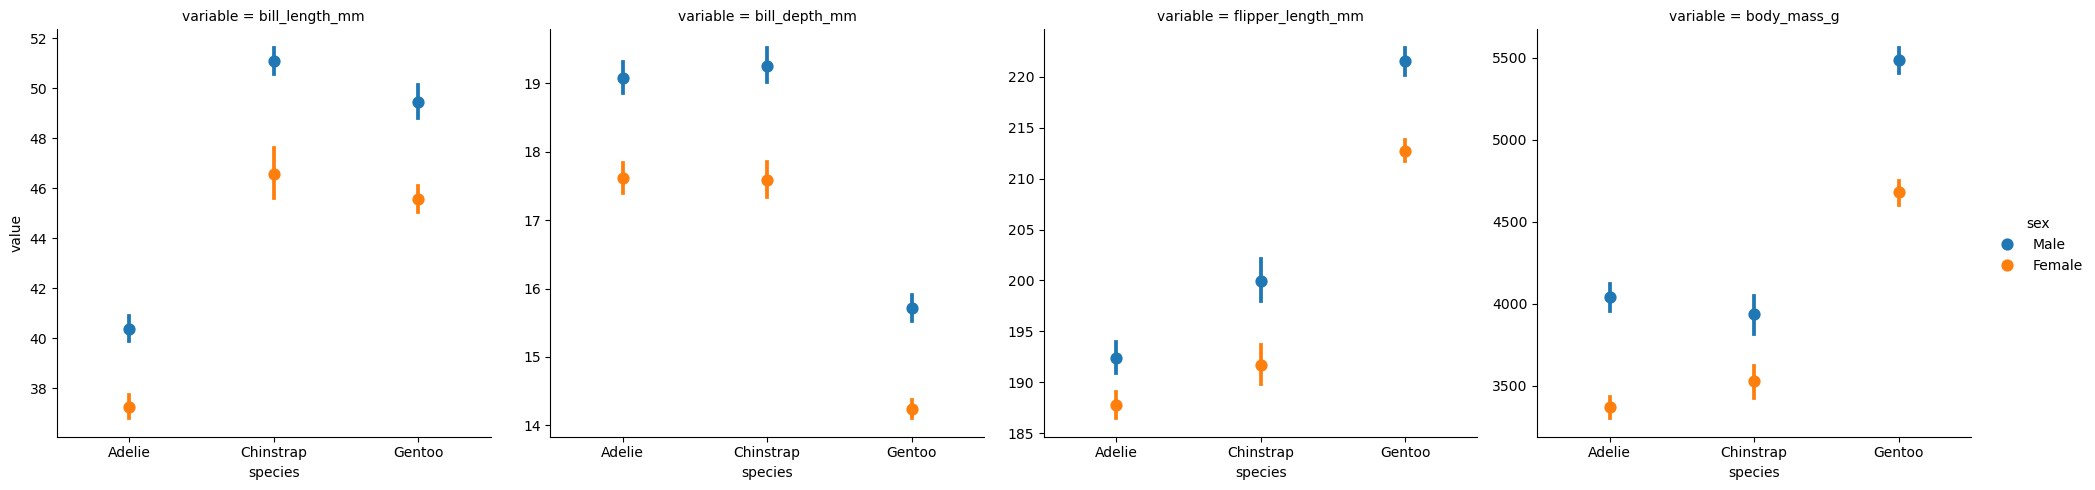

In [117]:
sns.catplot(data=df_clean_lf, 
            x='species', 
            y='value', 
            col='variable', 
            col_wrap=4,
            hue='sex',
            kind='point', 
            sharey=False,
            linestyle='none')
plt.show()

### Point Plot – Mean and Confidence Interval of the `flipper_length_mm` Continuous Variable, Grouped by Each `species` Categorical Variable

Gentoo penguins have the longest average flipper length, followed by Chinstrap penguins, with Adelie penguins having the shortest flippers. The error bars indicate the variability around the mean for each species.

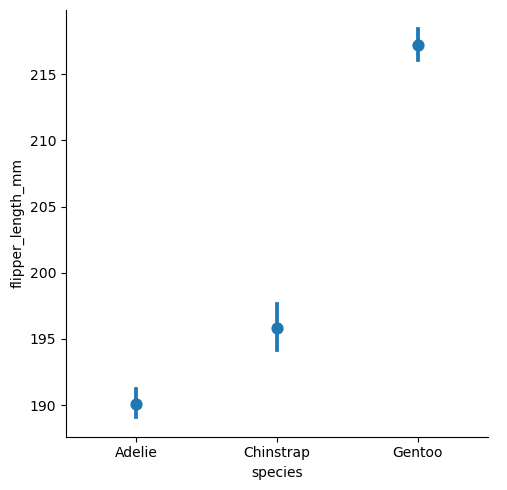

In [118]:
sns.catplot(data=df_clean, 
            x='species', 
            y='flipper_length_mm', 
            kind='point', 
            linestyle='none')
plt.show()

### Point Plot – Mean and Confidence Interval of the `body_mass_g` Continuous Variable, Grouped by Each Combination of `species` Categorical Variable, Colored by `sex` Categorical Variable

For each species, male penguins have a higher average body mass than female penguins. Gentoo penguins are the heaviest, followed by Chinstrap and then Adelie. The differences between males and females are consistent across species, with males weighing more.

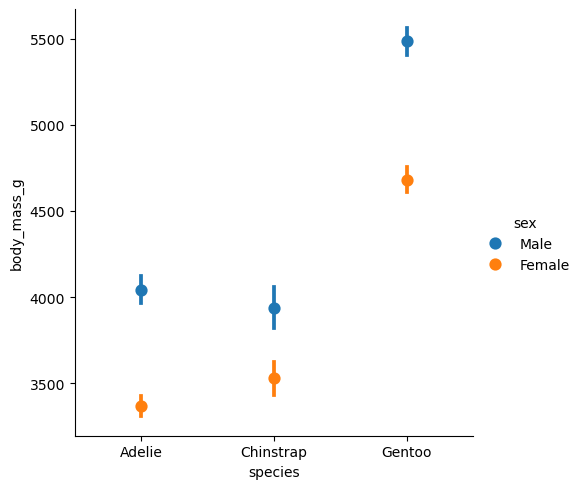

In [119]:
sns.catplot(data=df_clean, 
            x='species', 
            y='body_mass_g', 
            hue='sex', 
            kind='point',  
            linestyle='none')
plt.show()

### Pair Plots – Pairwise Relationships of All Numerical Variables

There are clear positive relationships among bill length, flipper length, and body mass in penguins—penguins with longer bills tend to have longer flippers and greater body mass. Bill depth displays less pronounced correlation with the other variables. Each variable also shows its own distribution along the diagonal, with flipper length and body mass having wider ranges compared to bill measurements.

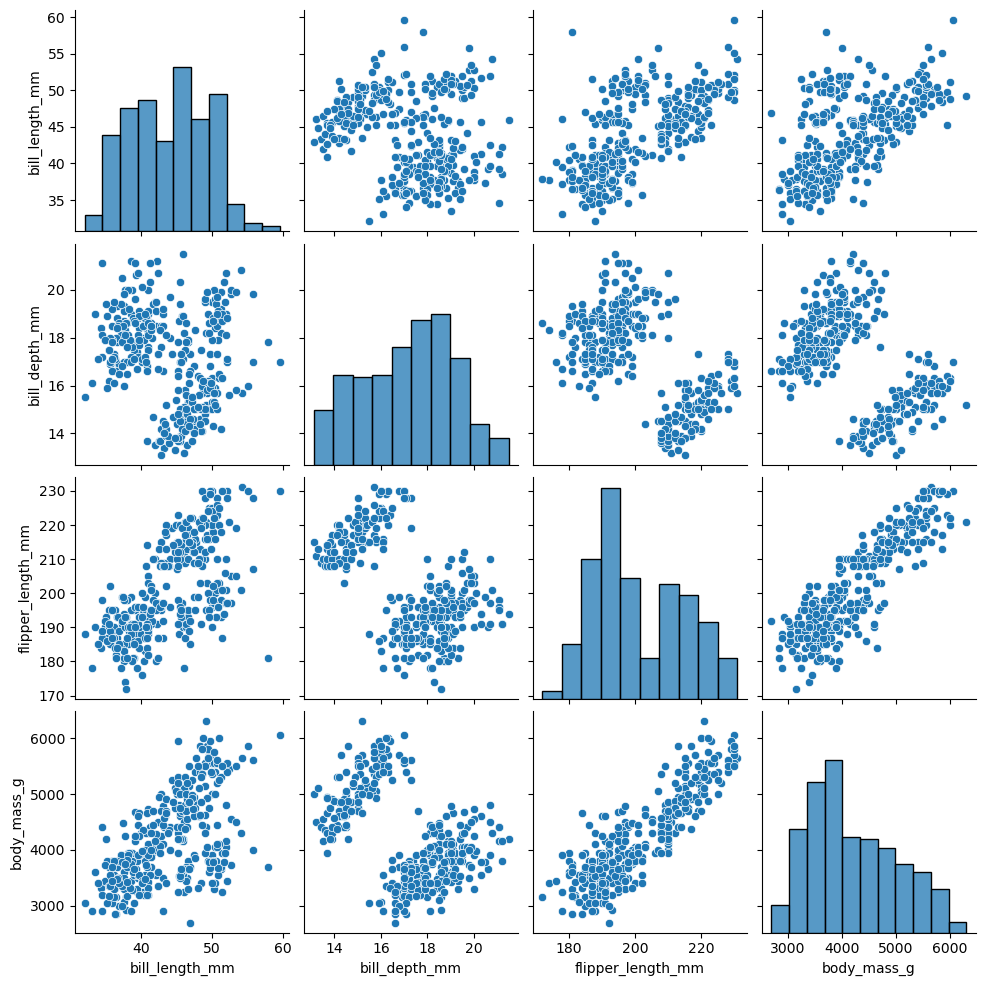

In [120]:
sns.pairplot(df_clean)
plt.show()

### Pair Plots – Pairwise Relationships of All Numerical Variables, Colored by `species` Categorical Variable

There are clear distinctions among Adelie, Chinstrap, and Gentoo penguins for all measured variables. Gentoo penguins generally have the largest bill length, flipper length, and body mass, while Adelie penguins have the smallest. Chinstrap penguins typically have the greatest bill depth. The scatter plots reveal strong positive relationships between flipper length and body mass, as well as between bill length and flipper length. Each species forms distinct clusters, highlighting the differences in physical traits.

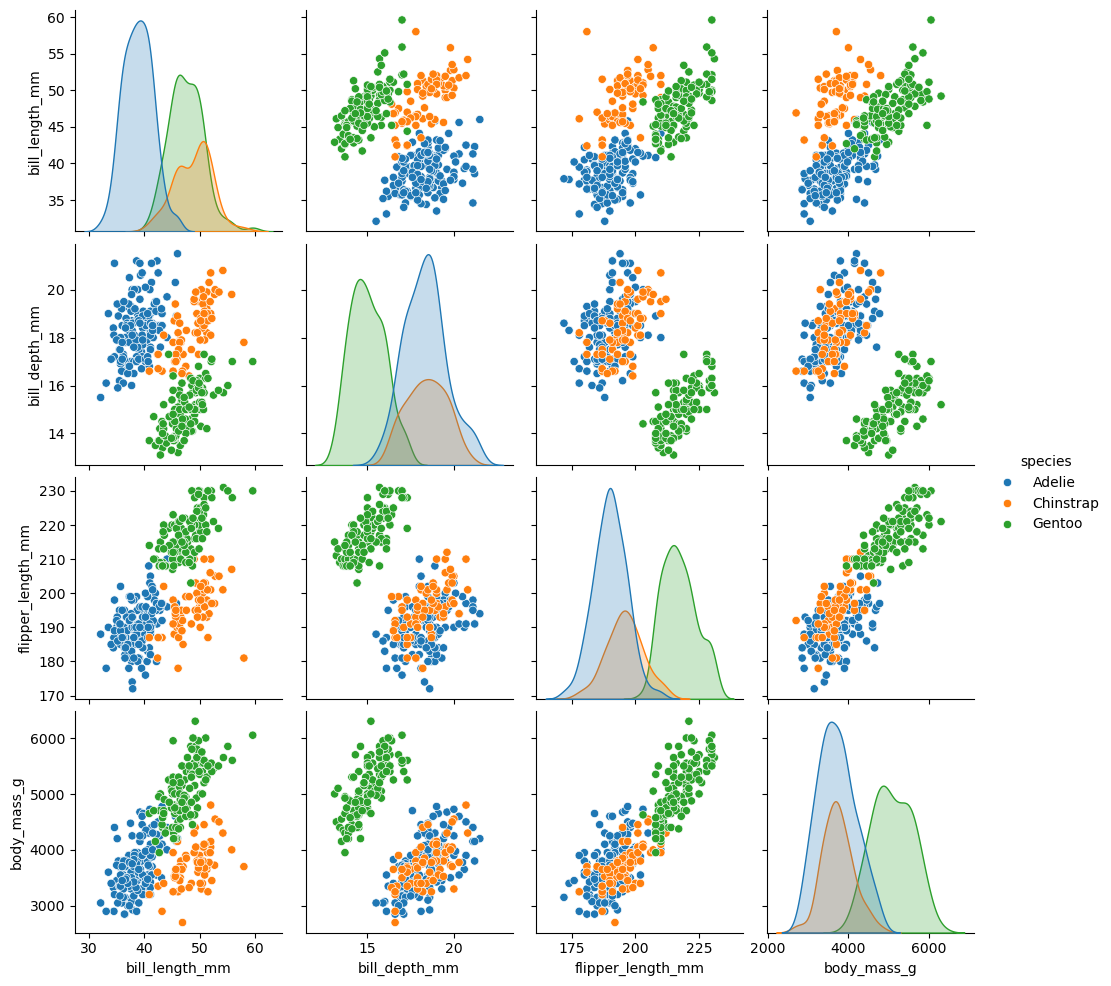

In [121]:
sns.pairplot(df_clean,
             hue='species')
plt.show()

### Scatter Plot – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables

Penguins with longer flippers tend to have lower bill depths, while those with shorter flippers generally have higher bill depths. This suggests a negative relationship between flipper length and bill depth among penguins, with two distinct clusters visible in the data.

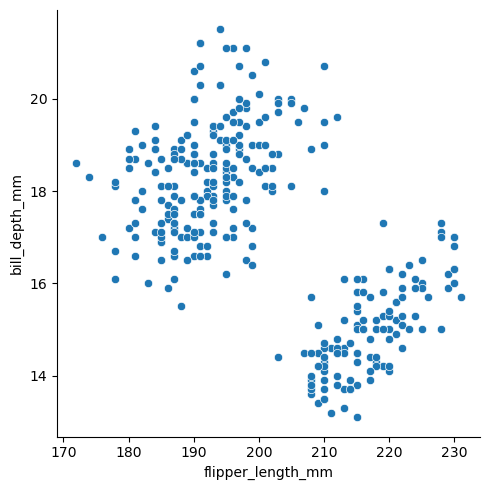

In [122]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm')
plt.show()

### Scatter Plot – Joint Distribution of the `bill_depth_mm` and `flipper_length_mm` Continuous Variables

There is a distinct pattern: penguins with lower bill depth tend to have longer flipper lengths, while those with higher bill depth generally have shorter flipper lengths. There are two clear clusters, indicating a negative relationship between bill depth and flipper length among the penguin data.

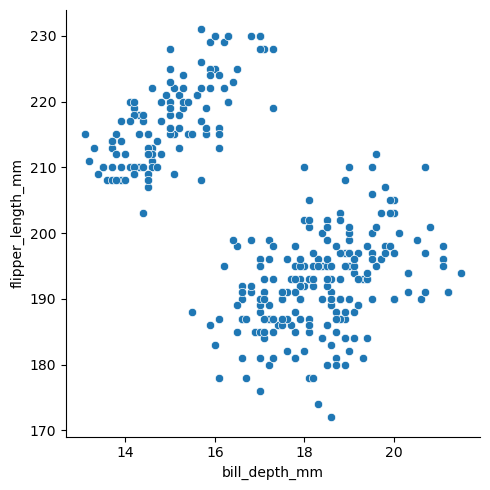

In [123]:
sns.relplot(data=df_clean, 
            x='bill_depth_mm', 
            y='flipper_length_mm')
plt.show()

### Scatter Plot – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables

There is a clear positive relationship between body mass and bill length in penguins. As body mass increases, bill length also tends to increase. The data points are fairly spread out but show a general upward trend, indicating that larger penguins tend to have longer bills.

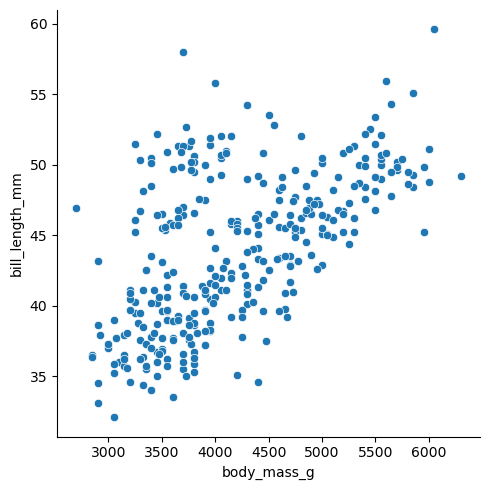

In [124]:
sns.relplot(data=df_clean, 
            x='body_mass_g', 
            y='bill_length_mm')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Faceted by Each `species` Categorical Variable

Gentoo penguins have longer flipper lengths and lower bill depths compared to the other species.

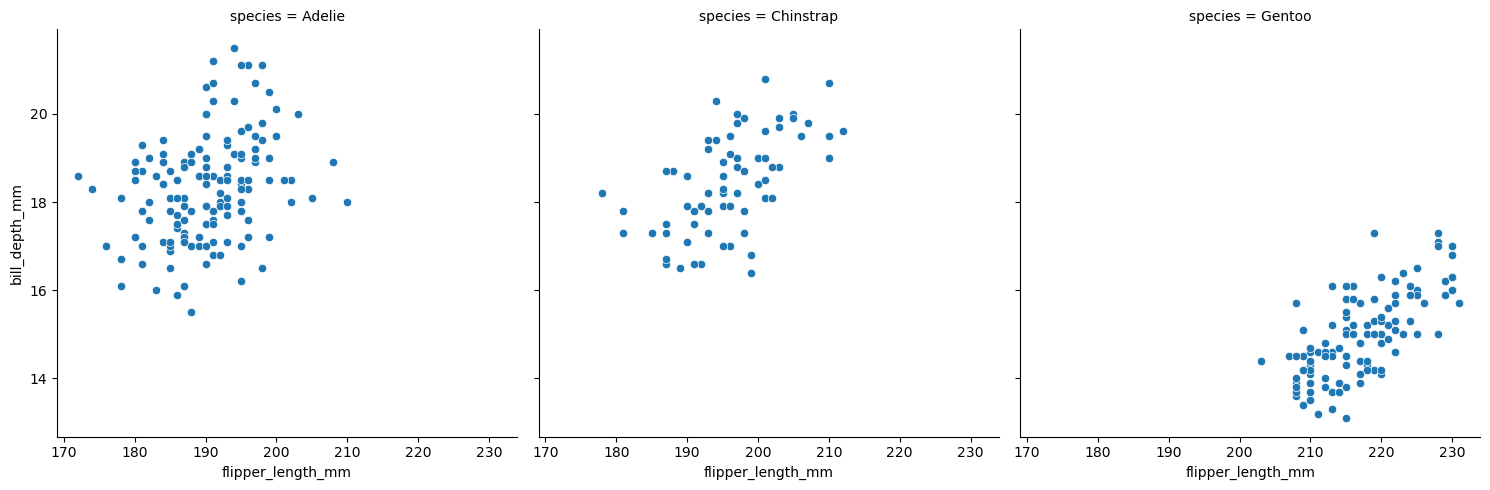

In [125]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm', 
            col='species')
plt.show()

### Scatter Plot – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Colored by `species` Categorical Variable

Adelie and Chinstrap penguins cluster together with higher bill depths and shorter flipper lengths, while Gentoo penguins are clearly separated—they have longer flipper lengths and lower bill depths. The color coding makes it easy to distinguish the species' differences and reveals that bill depth and flipper length are useful for differentiating Gentoo penguins from the other two species.

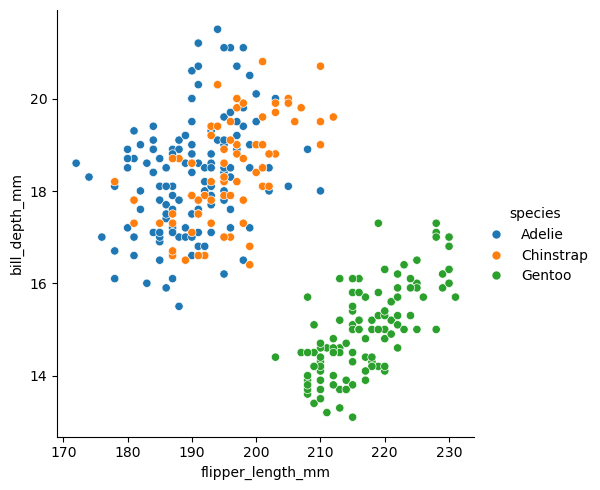

In [126]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm', 
            hue='species')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Faceted by Each `species` Categorical Variable, Colored by `species` Categorical Variable

Adelie penguins are shown in blue with flipper lengths mostly between 180 and 200 mm, and bill depths ranging from 16 to 21 mm. Chinstrap penguins, represented in orange, overlap with Adelie in flipper length but generally have slightly higher bill depths. Gentoo penguins, shown in green, form a distinct cluster with much longer flipper lengths (over 210 mm) and lower bill depths, clearly separated from the other two species. The color legend on the right facilitates species identification, and overall, the plot highlights the morphological differences among the three penguin species.

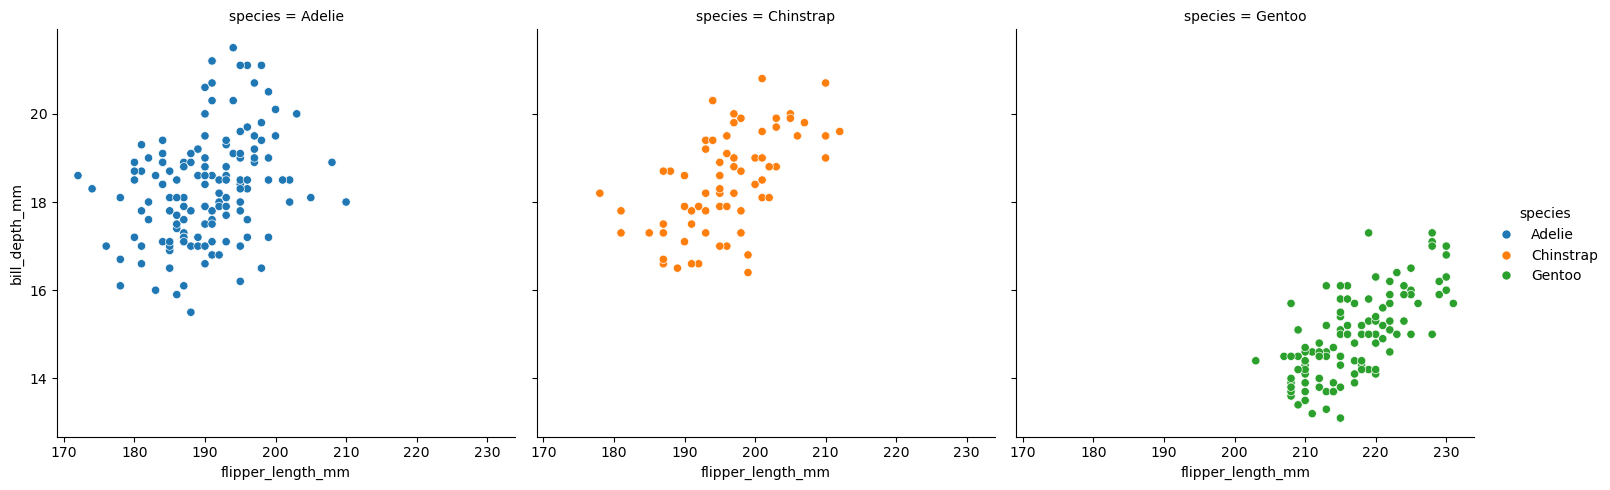

In [127]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm', 
            hue='species', 
            col='species')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Faceted by Each `island` Categorical Variable, Colored by `species` Categorical Variable

On Torgersen island (left), only Adelie penguins are present, and they cluster around shorter flipper lengths and higher bill depths. Biscoe island (middle) hosts both Adelie and Gentoo penguins; Adelie penguins overlap with those from Torgersen, while Gentoo penguins form a distinct group with longer flippers and lower bill depths. Dream island (right) features Adelie and Chinstrap penguins, both with higher bill depths and shorter flipper lengths, but Chinstrap penguins tend to have slightly greater bill depths than Adelie. The color legend clarifies species distribution, and the plots reveal how island location is associated with both species composition and their morphological characteristics.

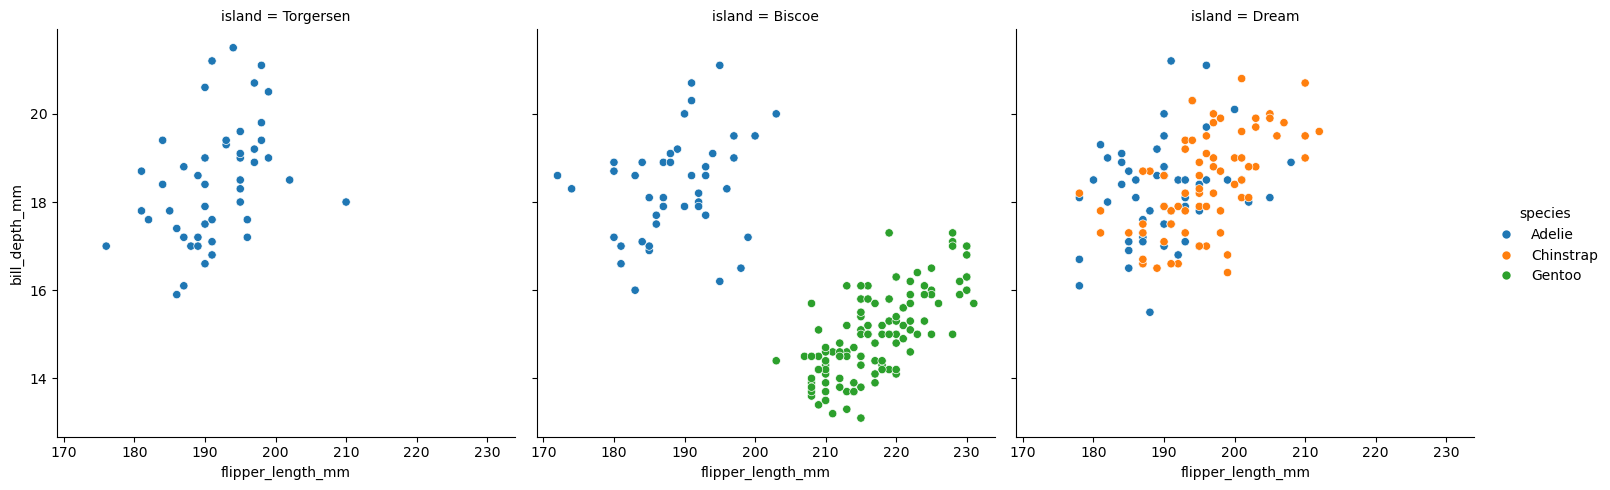

In [128]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm', 
            hue='species', 
            col='island')
plt.show()

### Scatter Plot Facets – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Faceted by Each Combination of `species` and `island` Categorical Variables, Colored by `sex` Categorical Variable

The Adelie penguin panels show data across all three islands, with some variation in the spread and clustering of male and female measurements. Chinstrap penguins are only present on Dream island, where males tend to have slightly greater flipper lengths and bill depths than females. Gentoo penguins appear only on Biscoe island, with males generally showing longer flipper lengths and higher bill depths compared to females. This visualization makes it easy to compare how sex, species, and island location interact to influence penguin morphology.

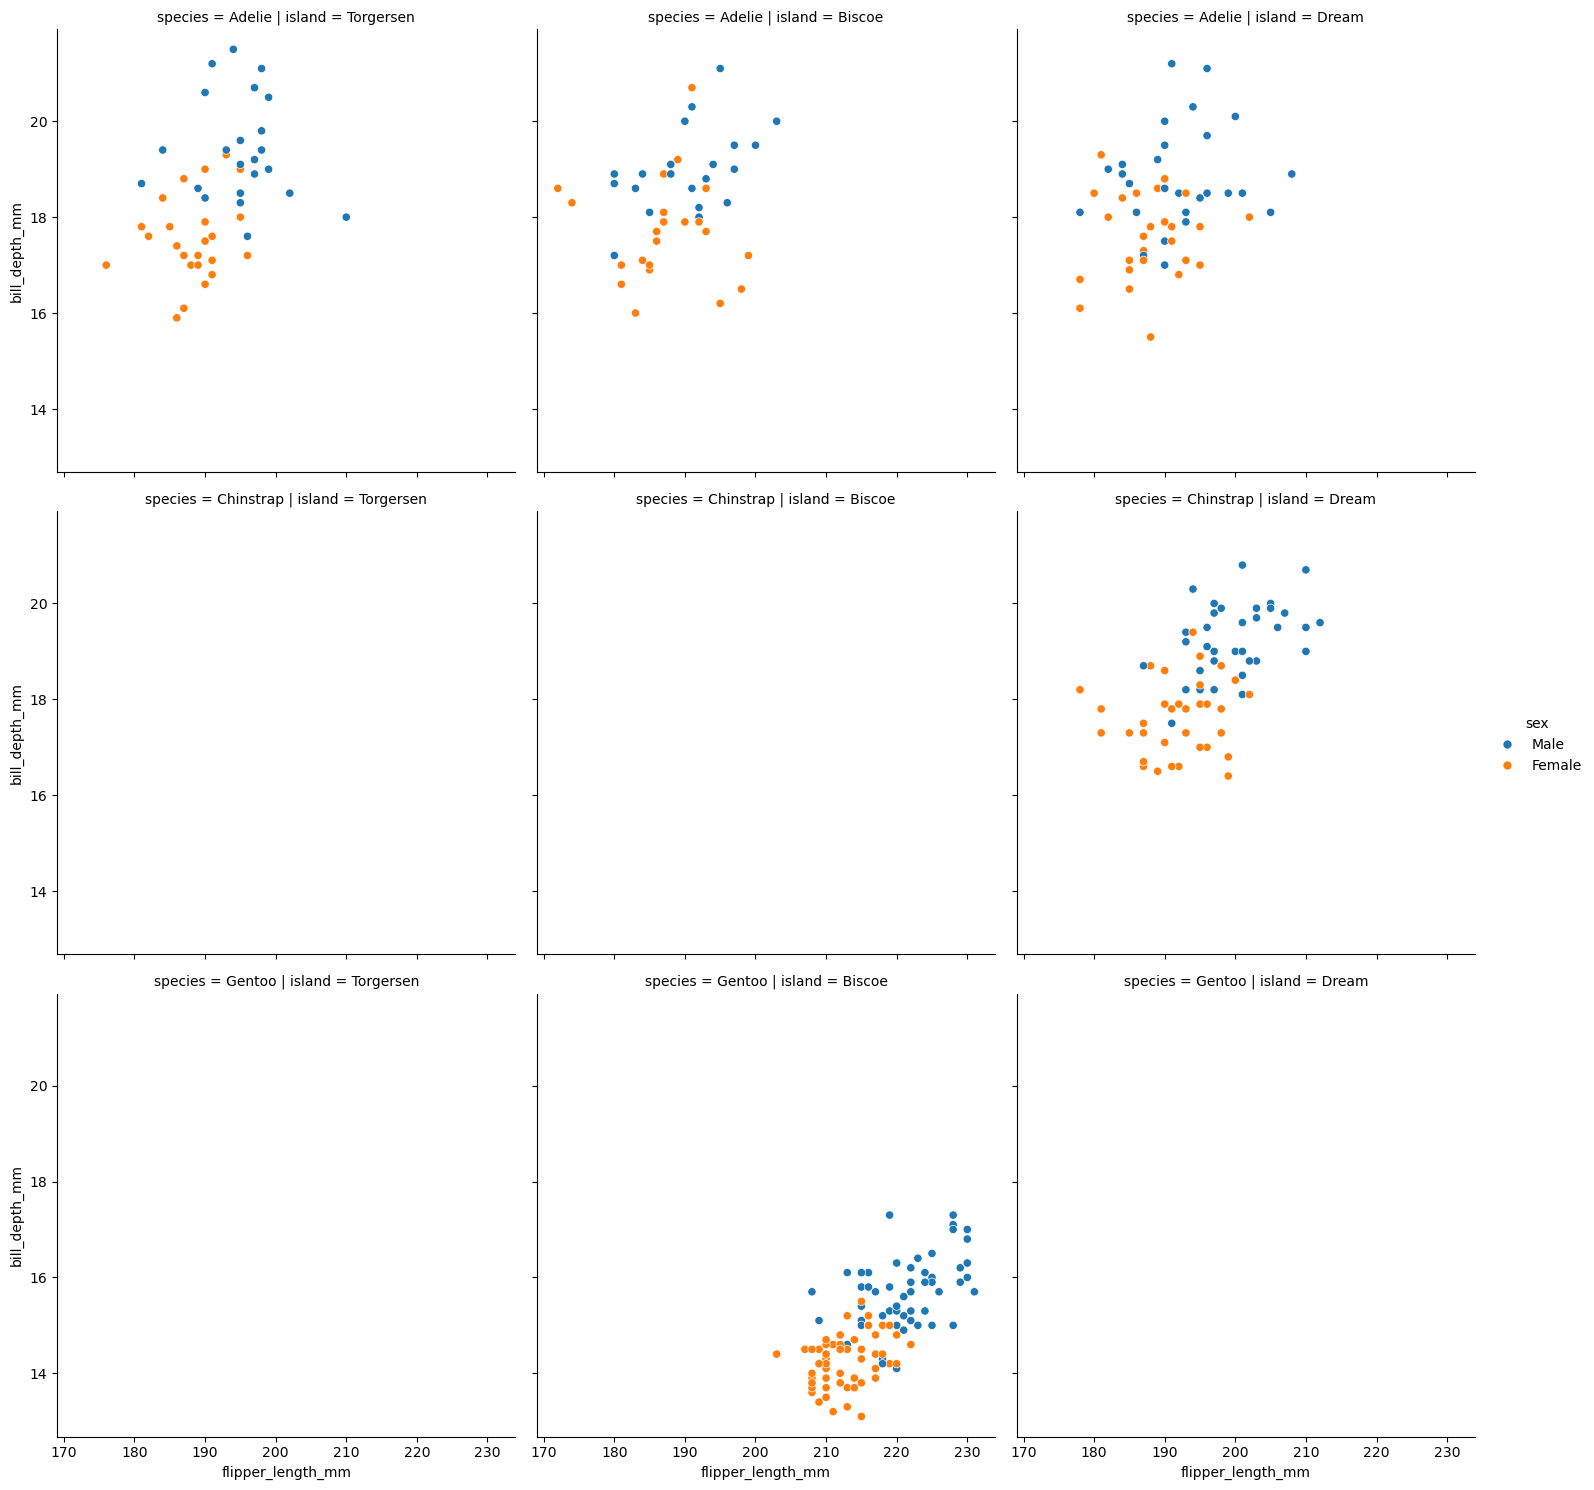

In [129]:
sns.relplot(data=df_clean, 
            x='flipper_length_mm', 
            y='bill_depth_mm',
            hue='sex',
            col='island',
            row='species')
plt.show()

### Trend Plot – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, with Fitted Linear Regression and Confidence Interval

The negative slope of the regression line indicates an inverse relationship: as flipper length increases, bill depth tends to decrease. The spread of points suggests that there are distinct clusters, likely representing different species, but overall, longer flippers are associated with shallower bills. The shaded area around the line provides a visual indication of the uncertainty or variability in this trend.

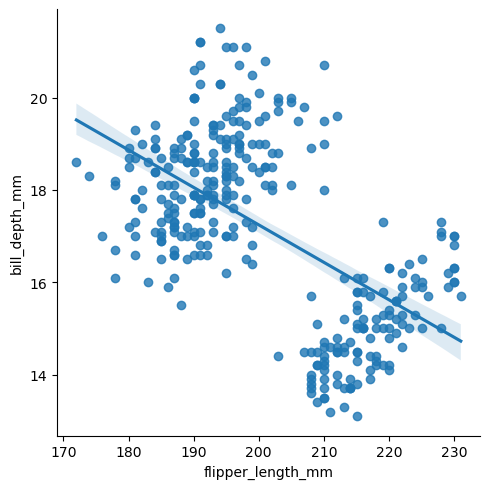

In [130]:
sns.lmplot(data=df_clean, 
           x='flipper_length_mm', 
           y='bill_depth_mm')
plt.show()

### Trend Plot – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables, with Fitted Linear Regression and Confidence Interval

The positive slope of the regression line indicates a direct correlation: as body mass increases, bill length also tends to increase. The data points are spread across a range of values, but the overall trend suggests that larger penguins generally have longer bills. The shaded area around the regression line represents the confidence interval, illustrating the variability in this relationship.

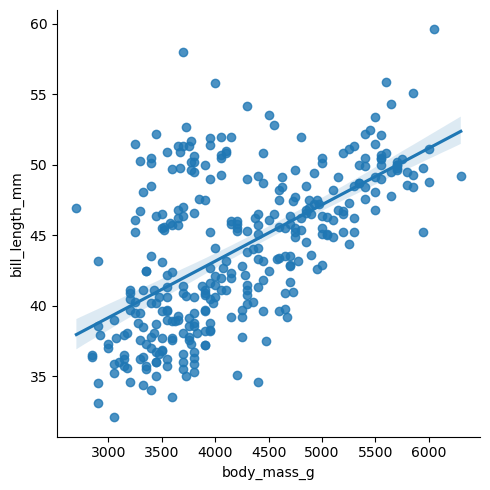

In [131]:
sns.lmplot(data=df_clean, 
           x='body_mass_g', 
           y='bill_length_mm')
plt.show()

### Trend Plot – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Colored by `species` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Adelie and Chinstrap regression lines indicate a positive correlation between the two variables for both species. Gentoo penguins form a distinct cluster with longer flipper lengths and lower bill depths, and their regression line also shows a positive association. The shaded regions around each regression line reflect the confidence intervals, highlighting the variability of the data within each species. Overall, the plot emphasizes both the differences in morphology between species and the positive relationship between flipper length and bill depth within each group.

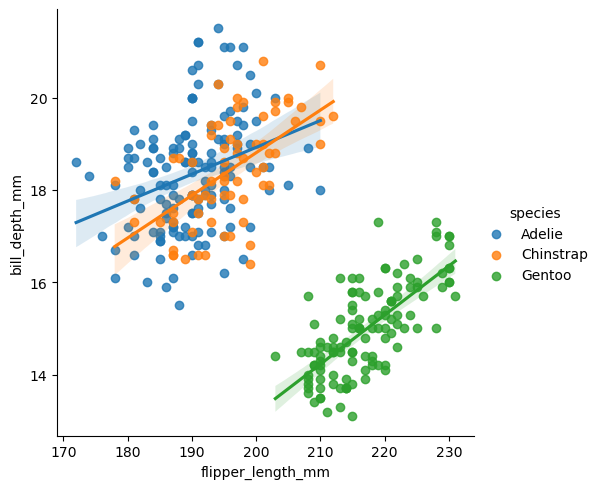

In [132]:
sns.lmplot(data=df_clean, 
           x='flipper_length_mm', 
           y='bill_depth_mm',
           hue='species')
plt.show()

### Trend Plot – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables, Colored by `species` Categorical Variable, with Fitted Linear Regression and Confidence Interval

All three species show a positive correlation between body mass and bill length, but their regression lines are vertically separated, indicating clear differences in average bill length among species for a given body mass. Chinstrap penguins (orange) generally have the longest bills for a given body mass, followed by Gentoo (green) and then Adelie (blue). The shaded regions around each regression line represent the variability within each species, and the plot overall highlights both the species-specific trends and the general pattern that heavier penguins tend to have longer bills.

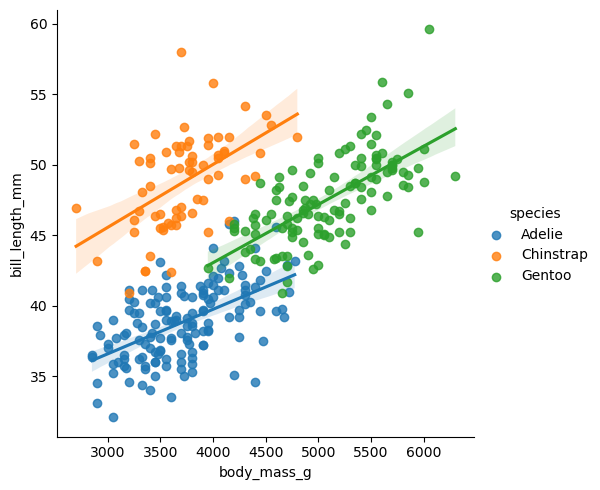

In [133]:
sns.lmplot(data=df_clean, 
           x='body_mass_g', 
           y='bill_length_mm',
           hue='species')
plt.show()

### Trend Plots – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables, Faceted by `sex` Categorical Variable, Colored by `species` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Males generally have longer bills than females for a given body mass, and that Chinstrap penguins have the longest bills, followed by Gentoo and Adelie.

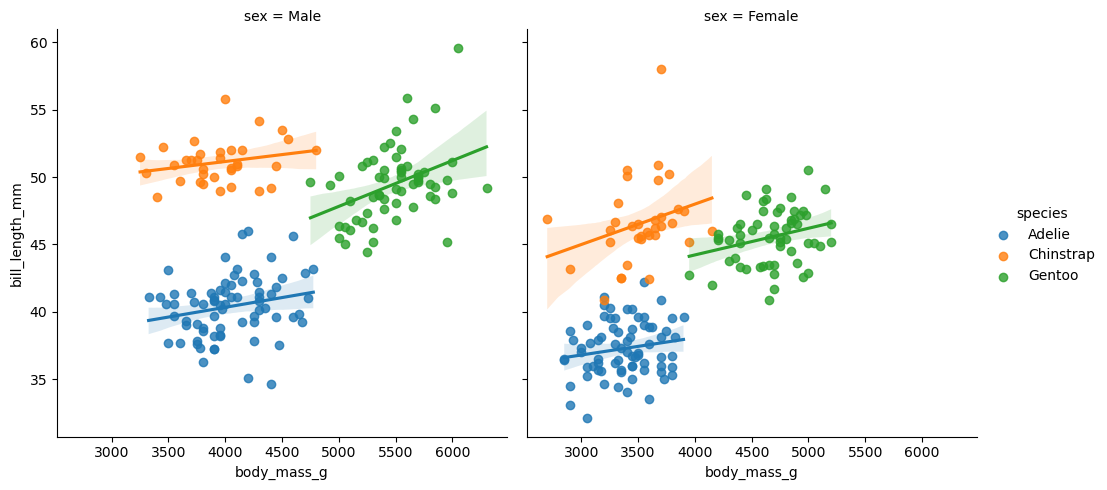

In [134]:
sns.lmplot(data=df_clean,
           x='body_mass_g', 
           y='bill_length_mm', 
           hue='species', 
           col='sex')
plt.show()

### Trend Plots – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables, Faceted by `species` Categorical Variable, Colored by `sex` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Males generally have longer bills than females for a given body mass across all species.

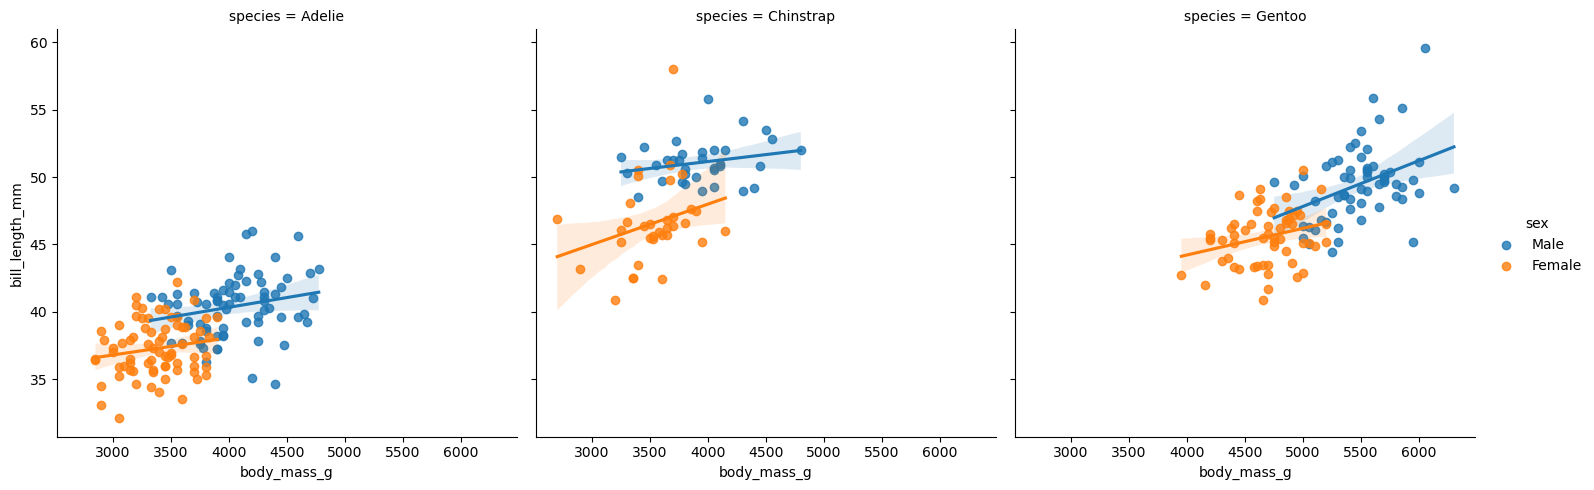

In [135]:
sns.lmplot(data=df_clean, 
           x='body_mass_g', 
           y='bill_length_mm', 
           hue='sex', 
           col='species')
plt.show()

### Trend Plots – Joint Distribution of the `body_mass_g` and `bill_length_mm` Continuous Variables, Faceted by Each Combination of `island` and `species` Categorical Variables, Colored by `sex` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Adelie penguins appear on all islands, Chinstrap penguins only on Dream, and Gentoo penguins only on Biscoe. In each group, males generally have longer bills than females for a given body mass, and the regression lines with confidence intervals highlight the differences and variability within each island-species-sex combination.

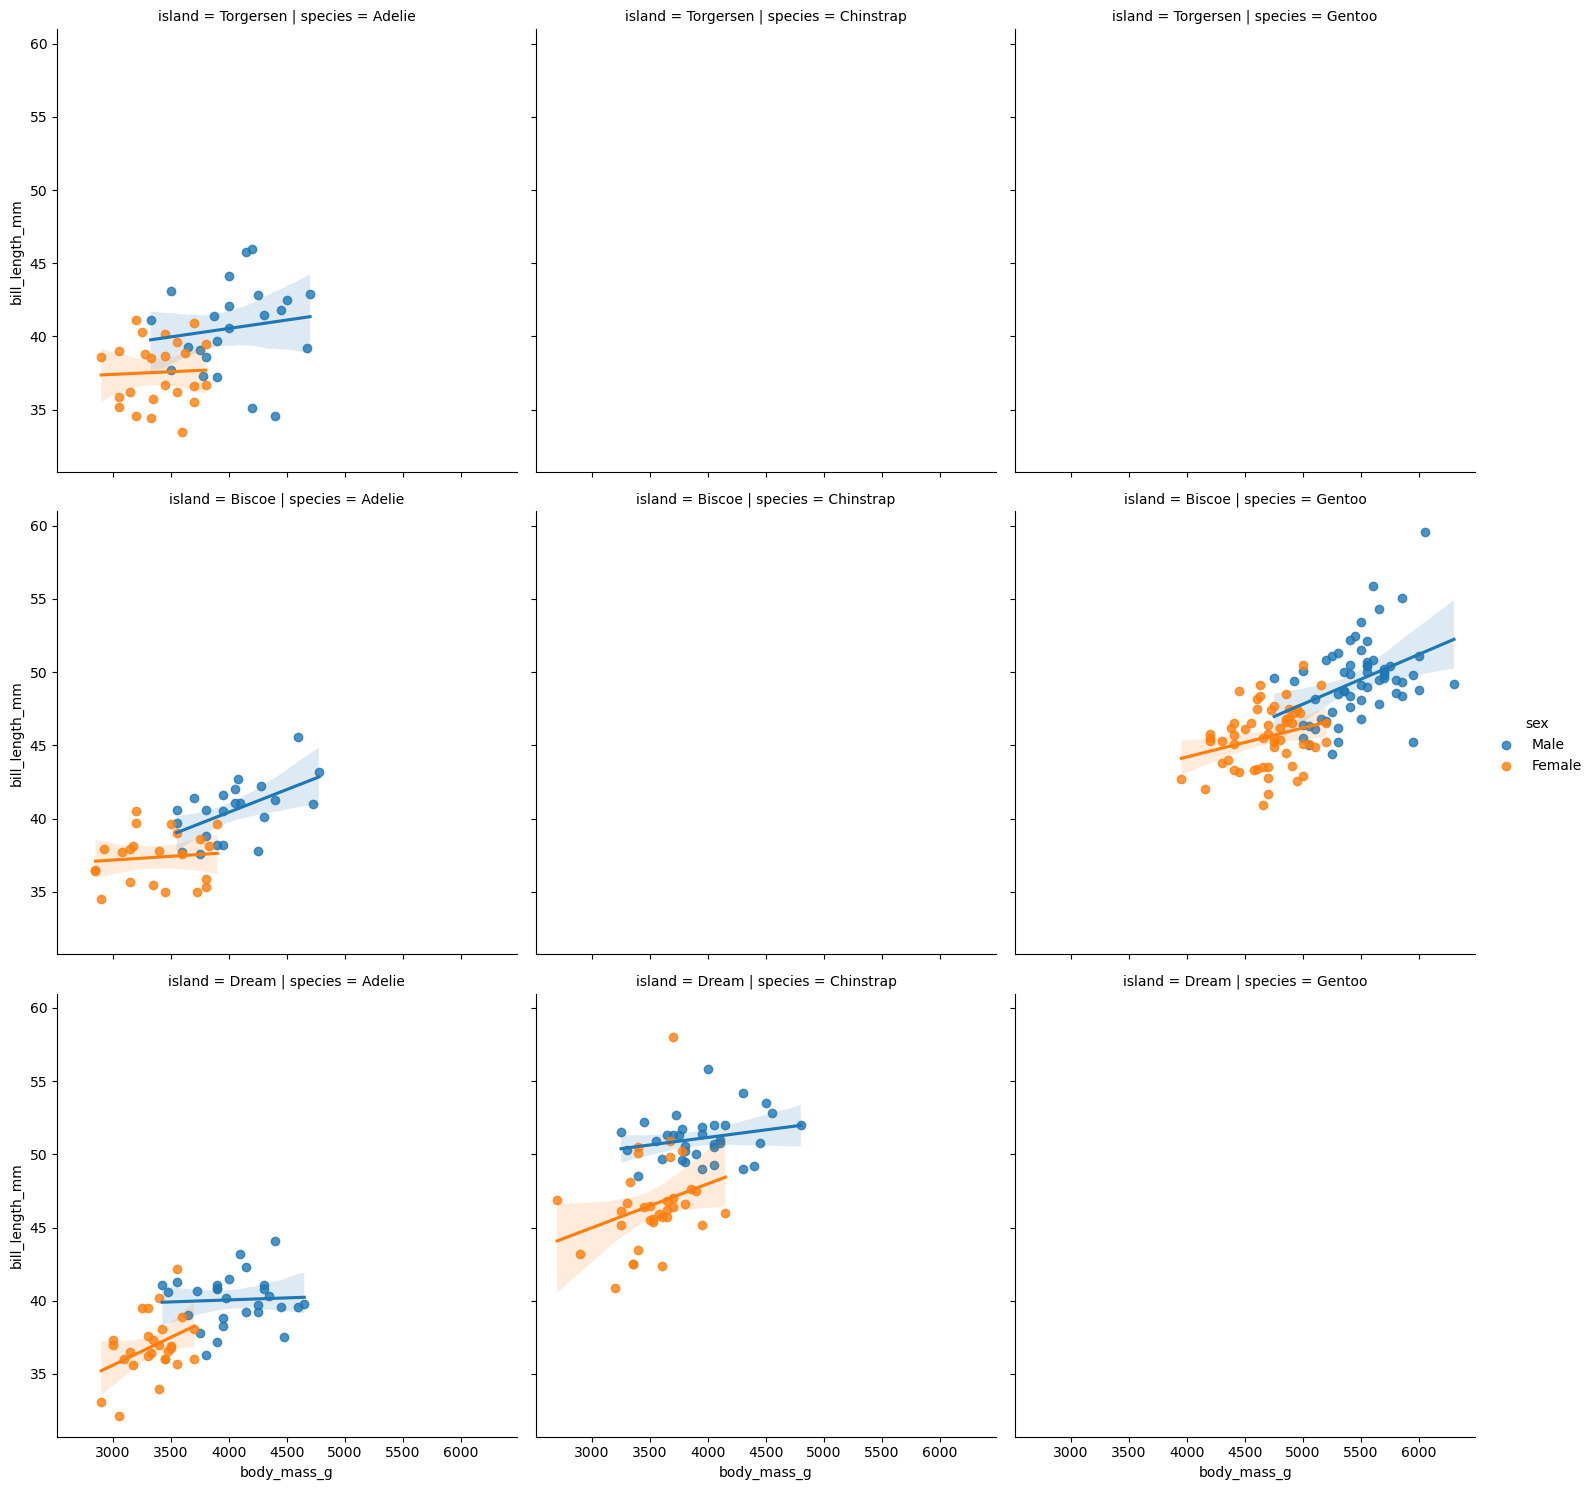

In [136]:
sns.lmplot(data=df_clean, 
           x='body_mass_g', 
           y='bill_length_mm', 
           hue='sex', 
           col='species', 
           row='island')
plt.show()

### Trend Plots – Joint Distribution of the `flipper_length_mm` and `bill_depth_mm` Continuous Variables, Faceted by Each Combination of `island` and `species` Categorical Variables, Colored by `sex` Categorical Variable, with Fitted Linear Regression and Confidence Interval

Adelie penguins appear on all islands, Chinstrap on Dream, and Gentoo on Biscoe and Dream, showing that males generally have deeper bills than females for a given flipper length, and highlighting differences in morphology across islands and species.

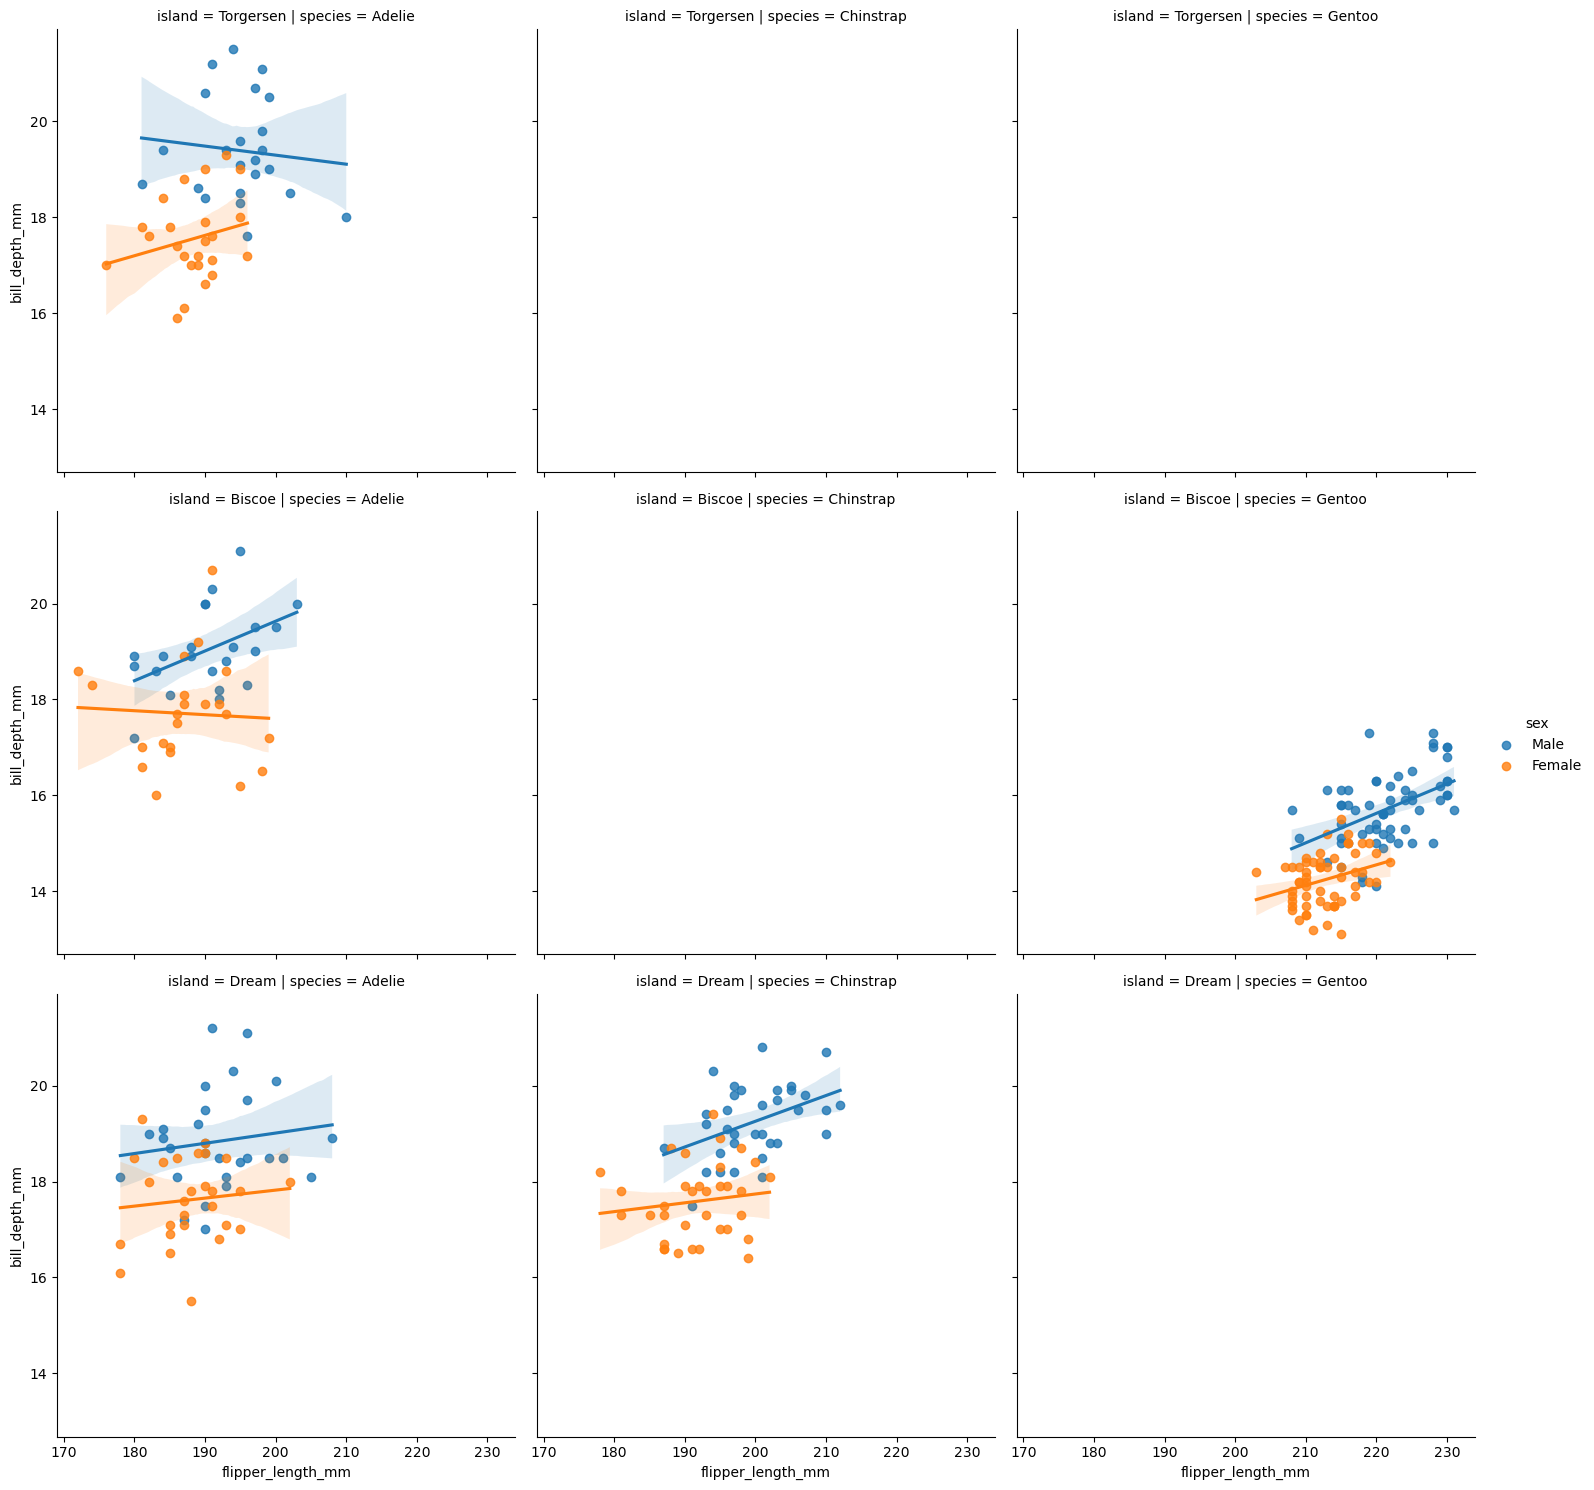

In [137]:
sns.lmplot(data=df_clean, 
           x='flipper_length_mm', 
           y='bill_depth_mm', 
           hue='sex', 
           col='species', 
           row='island')
plt.show()

### Correlation Plots - Correlation Matrix of All Numerical Variables


Flipper length and body mass are strongly positively correlated (0.87), bill length is moderately correlated with both flipper length (0.65) and body mass (0.59), and bill depth is negatively correlated with both flipper length (-0.58) and body mass (-0.47).

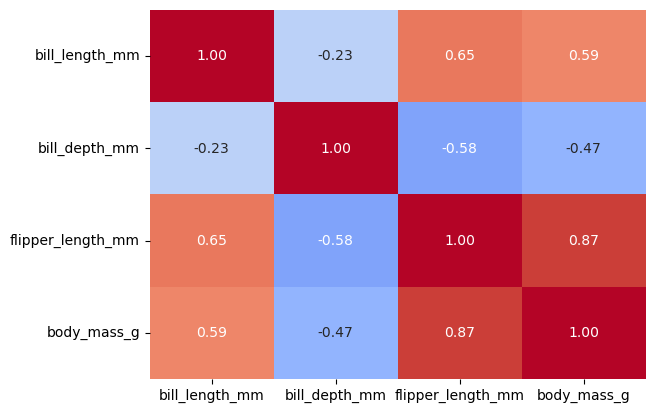

In [138]:
fig, ax = plt.subplots()
sns.heatmap(data=df_clean.corr(numeric_only=True),
            vmin=-1, 
            vmax=1, 
            center=0,
            cmap='coolwarm', 
            cbar=False,
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            ax=ax)
plt.show()

### Correlation Plots – Correlation Matrix of All Numerical Variables, Faceted by `species` Categorical Variable

Correlations among bill length, bill depth, flipper length, and body mass are stronger in Gentoo penguins (all above 0.65), moderate in Chinstrap (mostly 0.47–0.65), and weaker in Adelie (mostly 0.31–0.58), indicating species-specific differences in how morphological traits are related.

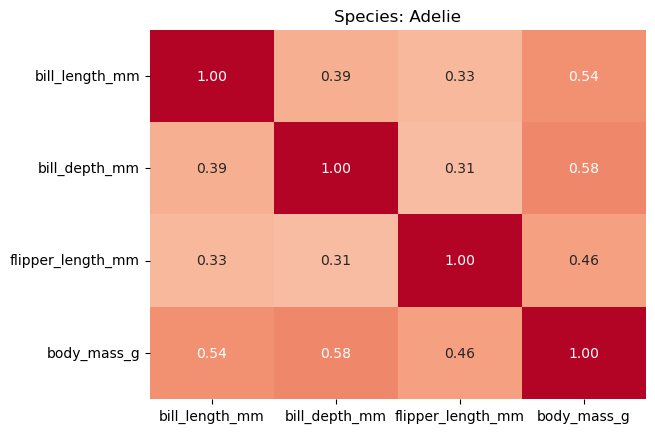

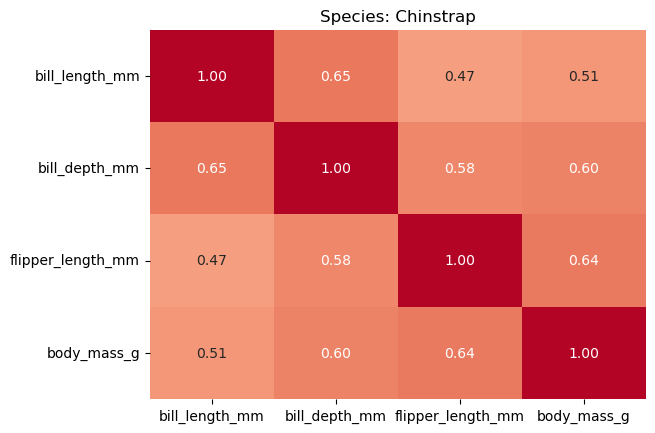

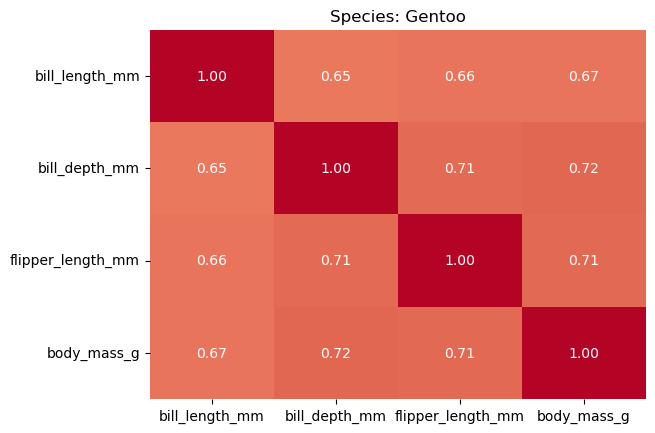

In [139]:
species_list = df_clean['species'].unique()
for species in species_list:
    fig, ax = plt.subplots()
    subset = df_clean[df_clean['species'] == species]
    sns.heatmap(data=subset.corr(numeric_only=True),
                vmin=-1,
                vmax=1,
                center=0,
                cmap='coolwarm',
                cbar=False,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                ax=ax)
    ax.set_title(f'Species: {species}')
    plt.show()

### Heat Map – Counts of Observations for Each Combination of `species` and `island` Categorical Variables


Adelie penguins are present on all three islands, Chinstrap penguins are found only on Dream island, and Gentoo penguins are found only on Biscoe island.

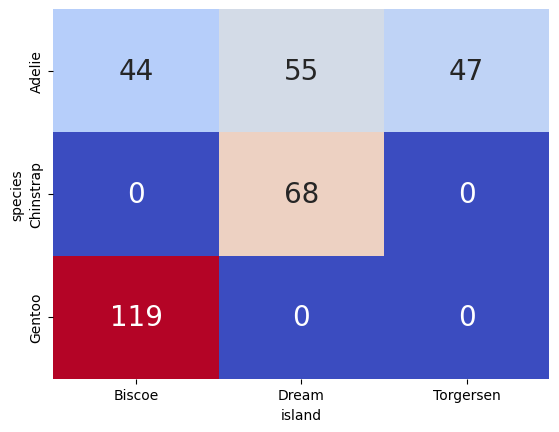

In [140]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_clean.species, 
                        df_clean.island), 
                        ax=ax,
                        annot=True, 
                        annot_kws={'size': 20}, 
                        fmt='d',
                        cmap='coolwarm',
                        cbar=False)
plt.show()

### Heat Map – Counts of Observations for Each Combination of `island` and `sex` Categorical Variables

Biscoe has the highest numbers of both females (80) and males (83), Dream island also has similar counts of females (61) and males (62), and Torgersen has the lowest counts, with 24 females and 23 males. The distribution of sexes is fairly balanced across all islands.

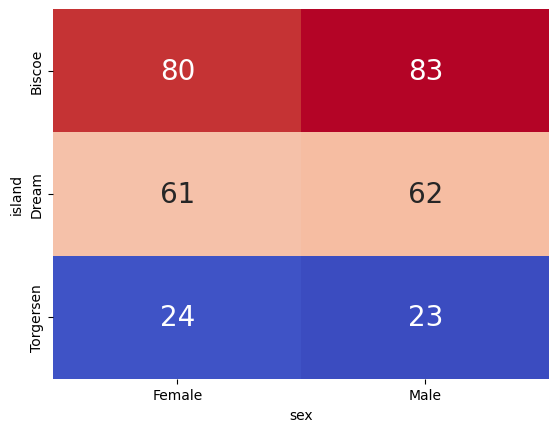

In [141]:
fig, ax = plt.subplots()
sns.heatmap(pd.crosstab(df_clean.island, 
                        df_clean.sex ), 
                        ax=ax,
                        annot=True, 
                        annot_kws={'size': 20}, 
                        fmt='d',
                        cmap='coolwarm',
                        cbar=False)
plt.show()

## Final Summation of EDA and Key Features for Modeling

The exploratory data analysis of the Palmer Penguins dataset, comprising 333 cleaned records after removing missing values, revealed distinct morphological differences among the three `species`: Adelie, Chinstrap, and Gentoo. Univariate analyses showed that `flipper_length_mm` and `body_mass_g` have the widest ranges and are strongly right-skewed, while `bill_length_mm` and `bill_depth_mm` are more normally distributed. Categorical variables like `sex` (balanced male/female) and `island` (Biscoe most common) showed varying distributions, with Gentoo exclusive to Biscoe, Chinstrap to Dream, and Adelie on all islands. Bivariate and multivariate visualizations, including pair plots and correlation matrices, indicated that `flipper_length_mm` (correlation with `body_mass_g` ~0.87 overall) and `body_mass_g` are the strongest linear predictors for distinguishing species, with Gentoo showing the largest values, followed by Chinstrap and Adelie. Bill measurements also differ, with Chinstrap having the longest bills and Adelie the shortest. For modeling species classification, key features should include `flipper_length_mm`, `body_mass_g`, `bill_length_mm`, and `bill_depth_mm` as primary predictors, while considering `island` and `sex` for interaction effects, and potentially feature engineering to capture non-linear relationships or ratios (e.g., bill length to depth) to enhance model performance.